## Movie recommendation system using Movie Lens Data 

# Movie recommendation system using Movie Lens Data 

## Content based Filtering

### Importing libraries and dataset + EDA

In [61]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math as math
# import time
import seaborn as sns
sns.set_style('darkgrid')

plt.rcParams['figure.figsize'] = [14, 14]


In [62]:
df = pd.read_csv(r"C:\Users\dell\Downloads\movie_lens.csv")
df.drop(columns='spoken_languages',inplace=True)
df.head()

categories  movieId                        title  \
0   ['Animation', 'Comedy', 'Family']      862                    Toy Story   
1  ['Adventure', 'Fantasy', 'Family']     8844                      Jumanji   
2               ['Romance', 'Comedy']    15602             Grumpier Old Men   
3      ['Comedy', 'Drama', 'Romance']    31357            Waiting to Exhale   
4                          ['Comedy']    11862  Father of the Bride Part II   

                                                                                                                                                                                                                                                                                                                                                                                                   description  \
0                                                                                              Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.   
1  When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures.   
2                                                                      A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming the locals who worry she'll scare the fish away. But she's less interested in seafood than she is in cooking up a hot time with Max.   
3                                                                                                                               Cheated on, mistreated and stepped on, the women are holding their breath, waiting for the elusive "good man" to break a string of less-than-stellar lovers. Friends and confidants Vannah, Bernie, Glo and Robin talk it all out, determined to find a better way to breathe.   
4                                                                               Just when George Banks has recovered from his daughter's wedding, he receives the news that she's pregnant ... and that George's wife, Nina, is expecting too. He was planning on selling their home, but that's a plan that -- like George -- will have to change with the arrival of both a grandchild and a kid of his own.   

  countries release_date  duration  rating  vote_count  \
0    ['US']   30-10-1995      81.0     7.7      5415.0   
1    ['US']   15-12-1995     104.0     6.9      2413.0   
2    ['US']   22-12-1995     101.0     6.5        92.0   
3    ['US']   22-12-1995     127.0     6.1        34.0   
4    ['US']   10-02-1995     106.0     5.7       173.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                         actors  \
0                                                                                                                                                                                                                                                            ['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim Varney', 'Wallace Shawn

In [63]:
# plt.hist(df.vote_count)
df.describe()

movieId      duration        rating    vote_count
count   34274.000000  34076.000000  34271.000000  34271.000000
mean   113895.869901     93.307929      5.569090    103.571270
std    113105.848048     38.250732      1.968803    471.986347
min         2.000000      0.000000      0.000000      0.000000
25%     29216.000000     85.000000      5.000000      3.000000
50%     65559.000000     94.000000      6.000000      9.000000
75%    171441.750000    106.000000      6.800000     31.000000
max    468707.000000   1256.000000     10.000000  14075.000000

In [64]:
df['release_date'] = pd.to_datetime(df['release_date'],format='mixed')
df['year'] = df['release_date'].dt.year
df['month'] = df['release_date'].dt.month
df['day'] = df['release_date'].dt.day
df.drop(columns='release_date',inplace=True)
df.head()

categories  movieId                        title  \
0   ['Animation', 'Comedy', 'Family']      862                    Toy Story   
1  ['Adventure', 'Fantasy', 'Family']     8844                      Jumanji   
2               ['Romance', 'Comedy']    15602             Grumpier Old Men   
3      ['Comedy', 'Drama', 'Romance']    31357            Waiting to Exhale   
4                          ['Comedy']    11862  Father of the Bride Part II   

                                                                                                                                                                                                                                                                                                                                                                                                   description  \
0                                                                                              Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.   
1  When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures.   
2                                                                      A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming the locals who worry she'll scare the fish away. But she's less interested in seafood than she is in cooking up a hot time with Max.   
3                                                                                                                               Cheated on, mistreated and stepped on, the women are holding their breath, waiting for the elusive "good man" to break a string of less-than-stellar lovers. Friends and confidants Vannah, Bernie, Glo and Robin talk it all out, determined to find a better way to breathe.   
4                                                                               Just when George Banks has recovered from his daughter's wedding, he receives the news that she's pregnant ... and that George's wife, Nina, is expecting too. He was planning on selling their home, but that's a plan that -- like George -- will have to change with the arrival of both a grandchild and a kid of his own.   

  countries  duration  rating  vote_count  \
0    ['US']      81.0     7.7      5415.0   
1    ['US']     104.0     6.9      2413.0   
2    ['US']     101.0     6.5        92.0   
3    ['US']     127.0     6.1        34.0   
4    ['US']     106.0     5.7       173.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                         actors  \
0                                                                                                                                                                                                                                                            ['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim Varney', 'Wallace Shawn', 'John Ratzenberger', 'Annie Potts', 'John Morris', 'Erik von Detten', 'Laur

In [65]:
df.shape

(34274, 13)

In [55]:
for i in df.columns:
    print(i,type(df[i][1]))

categories <class 'str'>
movieId <class 'numpy.int64'>
title <class 'str'>
description <class 'str'>
countries <class 'str'>
duration <class 'numpy.float64'>
rating <class 'numpy.float64'>
vote_count <class 'numpy.float64'>
actors <class 'str'>
directors <class 'str'>
year <class 'numpy.float64'>
month <class 'numpy.float64'>
day <class 'numpy.float64'>


In [66]:
import ast
for column_name in ['categories','actors','directors','countries']:
    df[column_name] = df[column_name].apply(ast.literal_eval)


In [67]:
df2= df.copy() # to control the size of input data (for fast testing)

### Using pretrained Glove Embeddings (pretrained on wikipedia) to vectorize the movie descriptions. Also normalizing+standarizing the embedding matrix

In [68]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.cluster import MiniBatchKMeans
import gensim.downloader as api
import time
import numpy as np
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
glove_model = api.load("glove-wiki-gigaword-100")

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    return [word for word in text if word.lower() not in stop_words]

def document_vector(embedding_model, doc):
    # Remove stopwords from the document
    doc = remove_stopwords(doc)
    
    # Remove out-of-vocabulary words
    doc = [word for word in doc if word in embedding_model.key_to_index]
    if not doc:
        return np.zeros(embedding_model.vector_size)
    return np.mean(embedding_model[doc], axis=0)

# Preprocess the text data (including stopwords removal)
text_content = df2['description'].apply(lambda x: remove_stopwords(str(x).lower().split()))

# Convert movie descriptions into word embeddings
document_vectors = np.array([document_vector(glove_model, doc) for doc in text_content])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [69]:
from sklearn.preprocessing import normalize

# Normalize the document vectors
normalized_document_vectors = normalize(document_vectors, norm='l2')

In [70]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to the document vectors and transform them
standardized_document_vectors = scaler.fit_transform(document_vectors)
st_norm_dc=normalize(standardized_document_vectors, norm='l2')

In [71]:
pd.set_option('display.max_colwidth',1000)
print("saurabh")

saurabh


### Generating graph

In [25]:
def find_similar(embeddings_matrix, index, n=5):
    cosine_similarities = linear_kernel(embeddings_matrix[index:index + 1],
            embeddings_matrix).flatten()
    related_docs_indices = [i for i in cosine_similarities.argsort()[::-1] if i != index]
    
    cosine_similarities.sort()
    x=cosine_similarities[::-1]
    if x[5]>.55:
        n=5
    elif x[3]>.55:
        n=3
    elif x[2]>.5:
        n=2
    elif x[1]>.4:
        n=1
    else:
        n=0
    # print(n)
    return [index for index in related_docs_indices][0:n]

G = nx.Graph(label='MOVIE')
# start_time = time.time()
for (i, rowi) in df2.iterrows():
    G.add_node(rowi['title'], key=rowi['id'], label='MOVIE',year=rowi['year'])
            #    mtype=rowi['type'], rating=rowi['rating'])
    for element in rowi['actors']:
        G.add_node(element, label='PERSON')
        G.add_edge(rowi['title'], element, label='ACTED_IN')
    for element in rowi['categories']:
        G.add_node(element, label='CAT')
        G.add_edge(rowi['title'], element, label='CAT_IN')
    for element in rowi['directors']:
        G.add_node(element, label='PERSON')
        G.add_edge(rowi['title'], element, label='DIRECTED')
    for element in rowi['countries']:
        G.add_node(element, label='COU')
        G.add_edge(rowi['title'], element, label='COU_IN')

    indices = find_similar(st_norm_dc, i)
    snode = f'description({rowi["title"]})'
    G.add_node(snode, label='SIMILAR')
    G.add_edge(rowi['title'], snode, label='SIMILARITY')
    for element in indices:
        G.add_edge(snode, df2['title'].loc[element], label='SIMILARITY')

# plt.figure(figsize=(15,10))
# nx.draw(G,with_labels=True)


In [30]:
# def find_similar_cosine(embeddings_matrix, movie_id, k=5):
#     cosine_similarities = linear_kernel(embeddings_matrix[movie_id:movie_id + 1], embeddings_matrix).flatten()
#     related_docs_indices = [i for i in cosine_similarities.argsort()[::-1] if i != movie_id]

#     return related_docs_indices[:k]

In [72]:
user_ratings=pd.read_csv(R"C:\Users\dell\Desktop\PGDBA\SEM2-IIT\FADML\FADML_MOVIE_DATASET\archive\ratings_small.csv")
user_ratings.head()

userId  movieId  rating
0       1       31     2.5
1       1     1029     3.0
2       1     1061     3.0
3       1     1129     2.0
4       1     1172     4.0

In [ ]:
####code temp dont use it

In [42]:
# from sklearn.metrics import mean_squared_error
# from sklearn.preprocessing import normalize, StandardScaler
# from sklearn.metrics.pairwise import linear_kernel
# # Function to find similar movies using cosine similarity
# # def find_similar_cosine(embeddings_matrix, movie_id, k=5):
# #     cosine_similarities = linear_kernel(embeddings_matrix[movie_id:movie_id + 1], embeddings_matrix).flatten()
# #     related_docs_indices = [i for i in cosine_similarities.argsort()[::-1] if i != movie_id]
# #     return related_docs_indices[:k]

# best_rmse = float('inf')
# best_k = 0
# # Predict rating for a specific user and movie using content-based filtering
# def predict_rating_content_based(user_id, movie_id, user_ratings, embeddings_matrix, k=5):
#     similar_movies = find_similar_cosine(embeddings_matrix, movie_id, k)
#     user_rated_similar_movies = [movie for movie in similar_movies if movie in user_ratings[user_id]]
    
#     if not user_rated_similar_movies:
#         return np.mean(list(user_ratings[user_id].values()))
    
#     similarities = [linear_kernel(embeddings_matrix[movie_id:movie_id+1], embeddings_matrix[movie:movie+1]).flatten()[0] for movie in user_rated_similar_movies]
#     ratings = [user_ratings[user_id][movie] for movie in user_rated_similar_movies]
    
#     weighted_sum = np.dot(similarities, ratings)
#     sum_of_weights = np.sum(similarities)
    
#     return weighted_sum / sum_of_weights if sum_of_weights != 0 else np.mean(list(user_ratings[user_id].values()))

# # Predict ratings for all user-movie pairs
# def predict_ratings_content_based(user_ratings, embeddings_matrix):
#     actual_ratings = []
#     predicted_ratings = []
    
#     for user_id, ratings in user_ratings.items():
#         for movie_id, actual_rating in ratings.items():
#             if movie_id < len(embeddings_matrix):
#                 predicted_rating = predict_rating_content_based(user_id, movie_id, user_ratings, embeddings_matrix)
#                 actual_ratings.append(actual_rating)
#                 predicted_ratings.append(predicted_rating)
    
#     return actual_ratings, predicted_ratings

# # Load and preprocess movie data
# def preprocess_movie_data(movie_df):
#     text_content = df2.apply(lambda x: remove_stopwords(str(x).lower().split()))
#     document_vectors = np.array([document_vector(glove_model, doc) for doc in text_content])

#     scaler = StandardScaler()
#     standardized_document_vectors = scaler.fit_transform(document_vectors)
#     embeddings_matrix = normalize(standardized_document_vectors, norm='l2')
    
#     return embeddings_matrix

# # Load rating data and create user_ratings dictionary
# def create_user_ratings(rating_df):
#     user_ratings = {}
#     for row in rating_df.itertuples():
#         user_id, movie_id, rating = row.userId, row.movieId, row.rating
#         if user_id not in user_ratings:
#             user_ratings[user_id] = {}
#         user_ratings[user_id][movie_id] = rating
#     return user_ratings

# # Function to calculate RMSE
# def calculate_rmse(actual_ratings, predicted_ratings):
#     return math.sqrt(mean_squared_error(actual_ratings, predicted_ratings))

#   # Ensure this CSV has columns: 'userId', 'movieId', 'rating'

#     # Preprocess movie data to get embeddings
# embeddings_matrix1 = preprocess_movie_data(df2)

#     # Create user_ratings dictionary from rating data
# user_ratings1 = create_user_ratings(user_ratings)

#     # Predict ratings using content-based filtering
# actual_ratings, predicted_ratings = predict_ratings_content_based(user_ratings1, embeddings_matrix1)

#     # Calculate and print RMSE
# rmse_content_based = calculate_rmse(actual_ratings, predicted_ratings)
# print("RMSE for Content-Based Filtering:", rmse_content_based)


# for k in range(1, 20):
#     def find_similar_cosine(embeddings_matrix, movie_id, k=k):
#         cosine_similarities = linear_kernel(embeddings_matrix[movie_id:movie_id + 1], embeddings_matrix).flatten()
#         related_docs_indices = [i for i in cosine_similarities.argsort()[::-1] if i != movie_id]
#         return related_docs_indices[:k]

#     actual_ratings, predicted_ratings = predict_ratings_content_based(user_ratings1, embeddings_matrix1)
#     rmse_content_based = calculate_rmse(actual_ratings, predicted_ratings)

#     if rmse_content_based < best_rmse:
#         best_rmse = rmse_content_based
#         best_k = k

# print(f"Best RMSE for Content-Based Filtering: {best_rmse} with k={best_k}")

RMSE for Content-Based Filtering: 5.419794977866543
Best RMSE for Content-Based Filtering: 5.419794977866543 with k=1


In [ ]:


# Download stopwords

# Load data
ratings_df = pd.read_csv(r"C:\Users\dell\Desktop\PGDBA\SEM2-IIT\FADML\FADML_MOVIE_DATASET\archive\ratings.csv")
movies_df = df2

# print("Ratings DataFrame columns:", ratings_df.columns)
# print("Movies DataFrame columns:", movies_df.columns)

# # Verify data types of 'userId' and 'movieId' columns
# print("Data types:")
# print("userId:", ratings_df['userId'].dtype)
# print("movieId:", movies_df['movieId'].dtype)

# # Print out a few rows of each DataFrame to visually inspect the data
# print("Ratings DataFrame sample:")
# print(ratings_df.head())
# print("\nMovies DataFrame sample:")
# print(movies_df.head())

# Initialize GloVe model

# Preprocess text
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return [word for word in text if word.lower() not in stop_words]

def document_vector(embedding_model, doc):
    doc = remove_stopwords(doc)
    doc = [word for word in doc if word in embedding_model.key_to_index]
    if not doc:
        return np.zeros(embedding_model.vector_size)
    return np.mean(embedding_model[doc], axis=0)

# Convert movie descriptions into word embeddings
movies_df['processed_description'] = movies_df['description'].apply(lambda x: remove_stopwords(str(x).lower().split()))
document_vectors = np.array([document_vector(glove_model, doc) for doc in movies_df['processed_description']])

# Normalize the document vectors
scaler = StandardScaler()
standardized_document_vectors = scaler.fit_transform(document_vectors)
normalized_document_vectors = normalize(standardized_document_vectors, norm='l2')

# Create user ratings dictionary
user_ratings = ratings_df.groupby('userId').apply(lambda x: dict(zip(x['movieId'], x['rating']))).to_dict()

# Map movie IDs to their indices in the embeddings matrix
movie_id_to_index = {movie_id: idx for idx, movie_id in enumerate(movies_df['movieId'])}

# Define functions for prediction and RMSE calculation
def find_similar_cosine(embeddings_matrix, movie_index, k):
    cosine_similarities = linear_kernel(embeddings_matrix[movie_index:movie_index + 1], embeddings_matrix).flatten()
    related_docs_indices = [i for i in cosine_similarities.argsort()[::-1] if i != movie_index]
    return related_docs_indices[:k]

def predict_rating_content_based(user_id, movie_id, user_ratings, embeddings_matrix, movie_id_to_index, k):
    if movie_id not in movie_id_to_index:
        return np.mean(list(user_ratings[user_id].values()))
    
    movie_index = movie_id_to_index[movie_id]
    similar_movies = find_similar_cosine(embeddings_matrix, movie_index, k)
    user_rated_similar_movies = [movie for movie in similar_movies if movie in user_ratings[user_id]]
    
    if not user_rated_similar_movies:
        return np.mean(list(user_ratings[user_id].values()))
    
    similarities = [linear_kernel(embeddings_matrix[movie_index:movie_index+1], embeddings_matrix[movie:movie+1]).flatten()[0] for movie in user_rated_similar_movies]
    ratings = [user_ratings[user_id][movie] for movie in user_rated_similar_movies]
    
    weighted_sum = np.dot(similarities, ratings)
    sum_of_weights = np.sum(similarities)
    
    return weighted_sum / sum_of_weights if sum_of_weights != 0 else np.mean(list(user_ratings[user_id].values()))

def predict_ratings_content_based(user_ratings, embeddings_matrix, movie_id_to_index, k):
    actual_ratings = []
    predicted_ratings = []
    
    for user_id, ratings in user_ratings.items():
        for movie_id, actual_rating in ratings.items():
            predicted_rating = predict_rating_content_based(user_id, movie_id, user_ratings, embeddings_matrix, movie_id_to_index, k)
            actual_ratings.append(actual_rating)
            predicted_ratings.append(predicted_rating)
    
    return actual_ratings, predicted_ratings

def calculate_rmse(actual_ratings, predicted_ratings):
    return math.sqrt(mean_squared_error(actual_ratings, predicted_ratings))

# Experiment with different values of k
best_rmse = float('inf')
best_k = 0

for k in range(1, 20):
    actual_ratings, predicted_ratings = predict_ratings_content_based(user_ratings, normalized_document_vectors, movie_id_to_index, k)
    rmse_content_based = calculate_rmse(actual_ratings, predicted_ratings)
    
    if rmse_content_based < best_rmse:
        best_rmse = rmse_content_based
        best_k = k

print(f"Best RMSE for Content-Based Filtering: {best_rmse} with k={best_k}")

# Visualize actual vs predicted ratings
plt.scatter(actual_ratings, predicted_ratings, alpha=0.5)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.show()

# Check data quality
print("Actual Ratings Summary:")
print(pd.Series(actual_ratings).describe())

print("Predicted Ratings Summary:")
print(pd.Series(predicted_ratings).describe())




In [ ]:
############code ended 

In [31]:
def predict_rating_content_based(user_id, movie_id, user_ratings, embeddings_matrix, k=5):
    similar_movies = find_similar_cosine(embeddings_matrix, movie_id, k)
    user_rated_similar_movies = [movie for movie in similar_movies if movie in user_ratings[user_id]]
    
    if not user_rated_similar_movies:
        return np.mean(list(user_ratings[user_id].values()))
    
    similarities = [linear_kernel(embeddings_matrix[movie_id:movie_id+1], embeddings_matrix[movie:movie+1]).flatten()[0] for movie in user_rated_similar_movies]
    ratings = [user_ratings[user_id][movie] for movie in user_rated_similar_movies]
    
    weighted_sum = np.dot(similarities, ratings)
    sum_of_weights = np.sum(similarities)
    
    return weighted_sum / sum_of_weights if sum_of_weights != 0 else np.mean(list(user_ratings[user_id].values()))

def predict_ratings_content_based(user_ratings, embeddings_matrix):
    actual_ratings = []
    predicted_ratings = []
    
    for user_id, ratings in user_ratings.items():
        for movie_id, actual_rating in ratings.items():
            predicted_rating = predict_rating_content_based(user_id, movie_id, user_ratings, embeddings_matrix)
            actual_ratings.append(actual_rating)
            predicted_ratings.append(predicted_rating)
    
    return actual_ratings, predicted_ratings

def calculate_rmse(actual_ratings, predicted_ratings):
    return math.sqrt(mean_squared_error(actual_ratings, predicted_ratings))

In [1]:
# Function to get recommendations and visualise the relevent part of the graph
def get_all_adj_nodes(list_in):
    sub_graph = set()
    for m in list_in:
        sub_graph.add(m)
        for e in G.neighbors(m):
            sub_graph.add(e)
    return list(sub_graph)


def draw_sub_graph(sub_graph, size='s',show_labels=False):
    subgraph = G.subgraph(sub_graph)
    colors = []
    edge_colors = []
    for e in subgraph.nodes():
        if G.nodes[e]['label'] == 'MOVIE':
            colors.append('#12DDF2')
        elif G.nodes[e]['label'] == 'PERSON':
            colors.append('#ed859d')
        elif G.nodes[e]['label'] == 'CAT':
            colors.append('#82E09B')
        elif G.nodes[e]['label'] == 'COU':
            colors.append('#edf283')
        elif G.nodes[e]['label'] == 'SIMILAR':
            colors.append('#edb672')

    for edge in subgraph.edges():
        if G.edges[edge]['label'] == 'SIMILARITY':
            edge_colors.append('#edb672')  # Change edge color if label is 'SIMILARITY'
        else:
            edge_colors.append('#c4c2be')

    if size == 's':
        plt.figure(figsize=(8, 8))
    else:
        plt.figure(figsize=(12, 12))

    #legends
    legend_labels = {'Movie': '#12DDF2', 'Person': '#ed859d', 'Cateagory': '#82E09B', 'Country': '#edf283', 'Similar Story': '#edb672'}
    for label, color in legend_labels.items():
        plt.scatter([], [], c=color, label=label)
    # plt.scatter([], [], c='#edb672', label='Similar description (Edges)')
    plt.legend(loc='upper left',fontsize='8')

    pos = nx.spring_layout(subgraph) 
    nx.draw(subgraph,pos=pos, with_labels=show_labels, font_size=7,node_color=colors, edge_color=edge_colors)
    labels = {node: node if G.nodes[node]['label'] in ['MOVIE','CAT','COU'] else '' for node in subgraph.nodes()}
    nx.draw_networkx_labels(subgraph, pos=pos, labels=labels, font_size=7)

    plt.show()


def get_recommendation(root):
    commons_dict = {}
    for e in G.neighbors(root):
        for e2 in G.neighbors(e):
            if e2 == root:
                continue
            if G.nodes[e2]['label'] == 'MOVIE':
                commons = commons_dict.get(e2)
                if commons == None:
                    commons_dict.update({e2: [e]})
                else:
                    commons.append(e)
                    commons_dict.update({e2: commons})
    movies = []
    weight = []
    for (key, values) in commons_dict.items():
        w = 0.0
        for e in values:
            w = w + 1 / math.log(G.degree(e))
        movies.append(key)
        weight.append(w)

    result = pd.Series(data=np.array(weight), index=movies)
    result.sort_values(inplace=True, ascending=False)
    return result

def content_based_recommendations(input_movie):
    print("*"*40+"\n\n Movie: "+input_movie+"\n\n"+"*"*40)

    list_in = [input_movie]
    sub_graph = get_all_adj_nodes(list_in)
    draw_sub_graph(sub_graph,show_labels=True)

    result = pd.DataFrame(get_recommendation(input_movie))
    # print(result.head())

    print ("\n")
    print("*"*100+"\n\n Extended Recommendation with Attributes")
    # print ("\n")
    print("*"*100)

    reco=list(result.index[:5].values)
    reco.extend([input_movie])
    sub_graph = get_all_adj_nodes(reco)
    draw_sub_graph(sub_graph, size='S')

    return result

NameError: name 'DD' is not defined

In [32]:
def create_user_ratings(rating_df):
    user_ratings = {}
    for row in rating_df.itertuples():
        user_id, movie_id, rating = row.userId, row.movieId, row.rating
        if user_id not in user_ratings:
            user_ratings[user_id] = {}
        user_ratings[user_id][movie_id] = rating
    return user_ratings

In [35]:
user_ratings=pd.read_csv(R"C:\Users\dell\Desktop\PGDBA\SEM2-IIT\FADML\FADML_MOVIE_DATASET\archive\ratings_small.csv")
user_ratings.head()

userId  movieId  rating
0       1       31     2.5
1       1     1029     3.0
2       1     1061     3.0
3       1     1129     2.0
4       1     1172     4.0

NameError: name 'user_ratings' is not defined

In [37]:

    # Create user_ratings dictionary from rating data
# user_ratings_indf = create_user_ratings(user_ratings)

    # Predict ratings using content-based filtering
actual_ratings, predicted_ratings = predict_ratings_content_based(user_ratings, st_norm_dc)

# Calculate and print RMSE
rmse_content_based = calculate_rmse(actual_ratings, predicted_ratings)
print("RMSE for Content-Based Filtering:", rmse_content_based)

ValueError: Found array with 0 sample(s) (shape=(0, 100)) while a minimum of 1 is required by check_pairwise_arrays.

### Testing

In [2]:
r=content_based_recommendations("Interstellar")

****************************************

 Movie: Interstellar

****************************************


NameError: name 'G' is not defined

### Extra

Clustering (Not really useful)

In [ ]:
from sklearn.cluster import KMeans

def cluster_movies(embeddings_matrix, num_clusters):
    # Apply K-means clustering to movie embeddings
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(embeddings_matrix)

    # Create a dictionary to store movies in each cluster
    clusters = {}
    for movie, cluster_label in zip(df['title'], cluster_labels):
        if cluster_label not in clusters:
            clusters[cluster_label] = []
        clusters[cluster_label].append(movie)

    return clusters

# Example usage:
num_clusters = 50  # Number of clusters
movie_clusters = cluster_movies(document_vectors, num_clusters)
for cluster_label, movies in movie_clusters.items():
    print(f"Cluster {cluster_label}: {movies}")


C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 42: ['Toy Story', 'Broken Arrow', 'Drop Zone', 'Far from Home: The Adventures of Yellow Dog', 'Gumby: The Movie', 'The Jungle Book', 'New Nightmare', 'Cabin Boy', 'Free Willy', 'Judgment Night', 'Jurassic Park', 'Much Ado About Nothing', 'Shall We Dance', 'The Great Race', 'Glengarry Glen Ross', 'Best of the Best 3: No Turning Back', 'Up in Smoke', 'Withnail & I', 'Braindead', 'アキラ', 'Butch Cassidy and the Sundance Kid', '101 Dalmatians', 'Tin Men', 'The Van', 'Inventing the Abbotts', '8 Heads in a Duffel Bag', "Romy and Michele's High School Reunion", 'The Second Jungle Book: Mowgli & Baloo', 'Con Air', 'Out to Sea', 'Steel', 'The Ice Storm', 'The Full Monty', 'Home Alone 3', '3 Ninjas: High Noon at Mega Mountain', 'Hard Rain', "In God's Hands", 'Niagara, Niagara', 'Major League: Back to the Minors', 'Friday the 13th Part VIII: Jason Takes Manhattan', 'Gremlins 2: The New Batch', 'The Goonies', 'Back to the Future Part II', 'Back to the Future Part III', 'The Apple Dumpling Ga

Cluster 42: ['Toy Story', 'Broken Arrow', 'Drop Zone', 'Far from Home: The Adventures of Yellow Dog', 'Gumby: The Movie', 'The Jungle Book', 'New Nightmare', 'Cabin Boy', 'Free Willy', 'Judgment Night', 'Jurassic Park', 'Much Ado About Nothing', 'Shall We Dance', 'The Great Race', 'Glengarry Glen Ross', 'Best of the Best 3: No Turning Back', 'Up in Smoke', 'Withnail & I', 'Braindead', 'アキラ', 'Butch Cassidy and the Sundance Kid', '101 Dalmatians', 'Tin Men', 'The Van', 'Inventing the Abbotts', '8 Heads in a Duffel Bag', "Romy and Michele's High School Reunion", 'The Second Jungle Book: Mowgli & Baloo', 'Con Air', 'Out to Sea', 'Steel', 'The Ice Storm', 'The Full Monty', 'Home Alone 3', '3 Ninjas: High Noon at Mega Mountain', 'Hard Rain', "In God's Hands", 'Niagara, Niagara', 'Major League: Back to the Minors', 'Friday the 13th Part VIII: Jason Takes Manhattan', 'Gremlins 2: The New Batch', 'The Goonies', 'Back to the Future Part II', 'Back to the Future Part III', 'The Apple Dumpling Ga

C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29481 (\N{CJK UNIFIED IDEOGRAPH-7329}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29579 (\N{CJK UNIFIED IDEOGRAPH-738B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12450 (\N{KATAKANA LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\

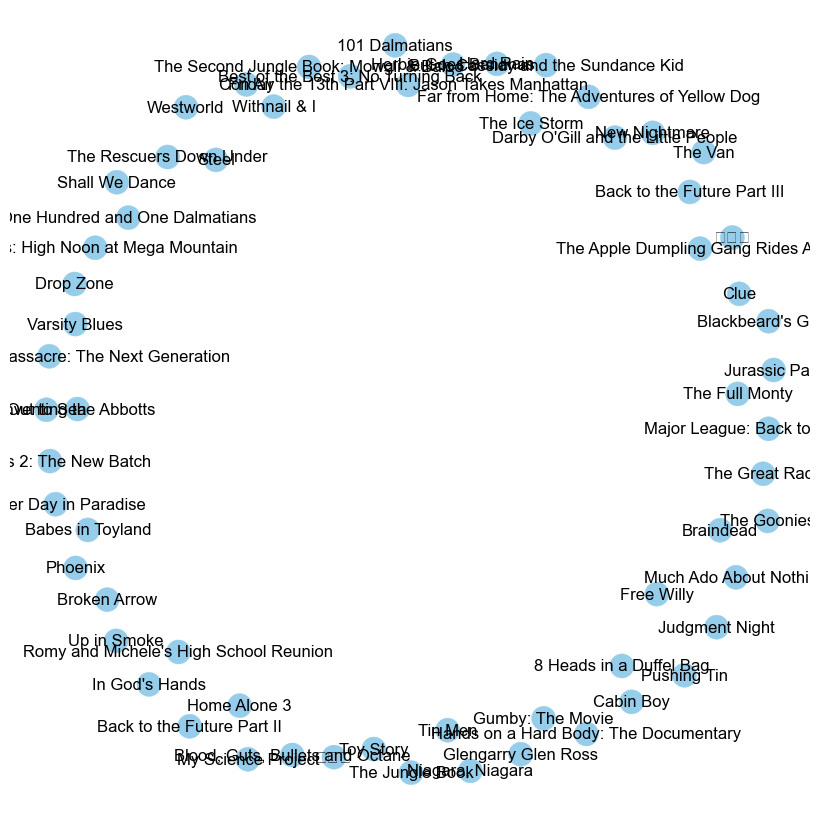

Cluster 1: ['Jumanji', 'Waiting to Exhale', 'Powder', 'It Takes Two', 'The Big Green', "Don't Be a Menace to South Central While Drinking Your Juice in the Hood", 'Bed of Roses', 'Nico Icon', 'Heidi Fleiss: Hollywood Madam', 'Steal Big Steal Little', 'Mighty Morphin Power Rangers: The Movie', 'Clerks', 'Exit to Eden', 'Hideaway', 'Heavyweights', 'The Jerky Boys', 'Little Women', 'Pao Da Shuang Deng', 'Shallow Grave', 'Double Happiness', 'I Love Trouble', 'Reality Bites', 'Desert Winds', 'Addams Family Values', 'Another Stakeout', 'The Beverly Hillbillies', 'Palookaville', 'Jean de Florette', 'Everything Relative', 'Grosse fatigue', 'Passion Fish', 'Le Grand Bleu', 'Rosencrantz & Guildenstern Are Dead', 'The Treasure of the Sierra Madre', 'The Shining', 'The Deer Hunter', 'A Nightmare on Elm Street', 'Grease', 'Beavis and Butt-Head Do America', 'Walkabout', 'Crash', 'The Designated Mourner', 'Squeeze', 'Love Serenade', 'In the Company of Men', 'The Edge', 'Deceiver', 'Critical Care', 'T

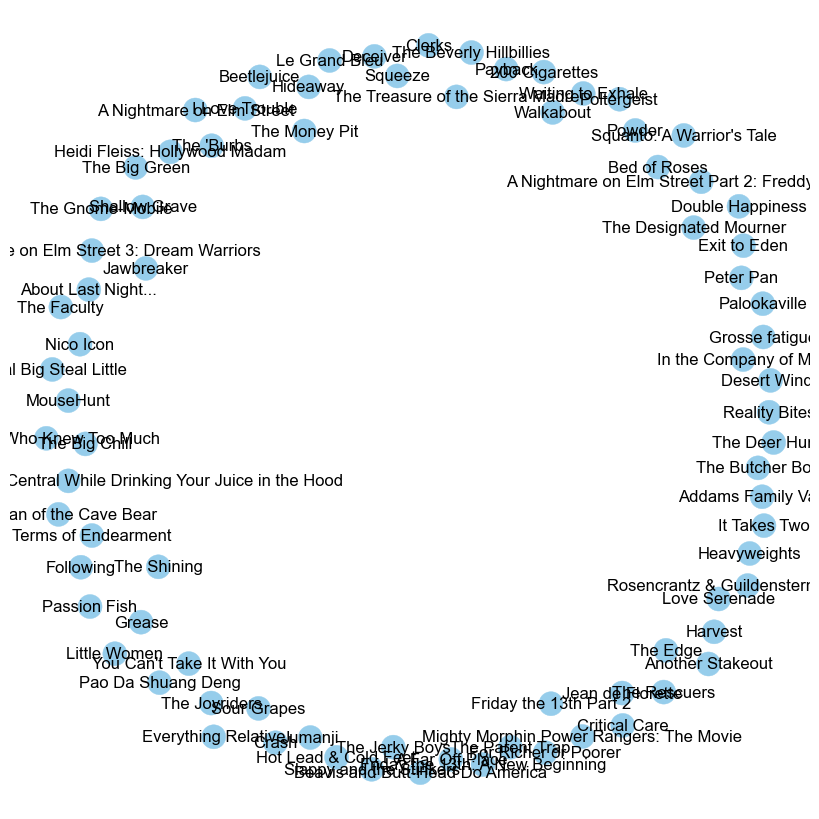

Cluster 19: ['Grumpier Old Men', 'Richard III', 'Guardian Angel', 'Antonia', '重慶森林', 'The Amazing Panda Adventure', 'Reckless', 'Showgirls', 'Les parapluies de Cherbourg', 'Gordy', 'The Secret of Roan Inish', 'Girl in the Cadillac', 'Color of Night', 'Even Cowgirls Get the Blues', 'The Ref', 'Dirty Dancing', 'Rebel Without a Cause', 'Manon des Sources', 'Parallel Sons', 'Amityville: A New Generation', 'The Birds', 'Ripe', 'The Locusts', 'Hugo Pool', 'Witness', 'Tainted', 'Welcome to Woop Woop', "Barney's Great Adventure", 'Mulan', 'Grand Hotel', 'Midnight Cowboy', 'Labyrinth', "Freddy's Dead: The Final Nightmare", 'Friday the 13th Part III', 'Honey, I Shrunk the Kids', 'Halloween: H20', 'Children of the Corn', 'The Secret of NIMH', "Rosemary's Baby", 'Willow', 'The Lady Vanishes', 'The Seventh Sign', 'Pecker', 'Fletch Lives', 'Psycho', 'Alligator']


C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24950 (\N{CJK UNIFIED IDEOGRAPH-6176}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26862 (\N{CJK UNIFIED IDEOGRAPH-68EE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-

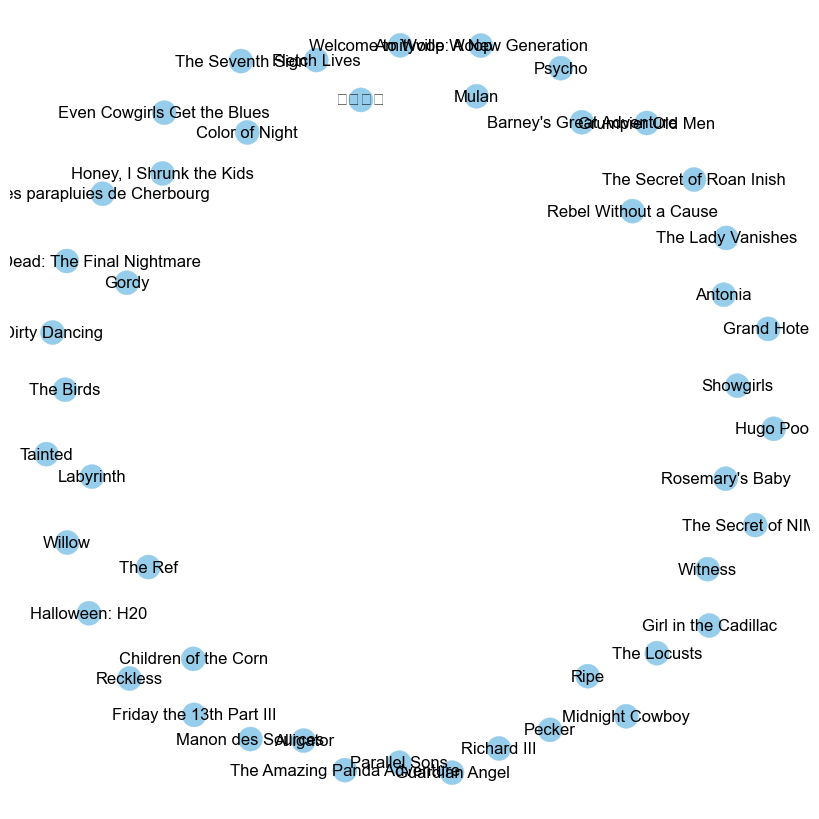

Cluster 3: ['Father of the Bride Part II', 'Dracula: Dead and Loving It', 'Babe', 'Two If by Sea', 'Lawnmower Man 2: Beyond Cyberspace', 'Two Bits', 'Kicking and Screaming', 'بادکنک سفید', 'The Journey of August King', 'Vampire in Brooklyn', 'Blue in the Face', 'Jury Duty', 'Billy Madison', 'Destiny Turns on the Radio', 'Dumb and Dumber', 'Love Affair', 'The Naked Gun 33⅓: The Final Insult', 'Red Rock West', 'True Lies', 'Bad Girls', 'Calendar Girl', 'Cops & Robbersons', 'The Firm', 'The Getaway', 'Getting Even with Dad', 'A Good Man in Africa', 'Life With Mikey', 'What Happened Was...', 'Renaissance Man', 'Shadow Conspiracy', 'Swingers', 'Johns', 'A Fish Called Wanda', 'The Candidate', "Weekend at Bernie's", 'La fille seule', 'Strictly Ballroom', 'Raging Bull', 'Local Hero', 'Real Genius', 'Amityville 3-D', 'Burnt Offerings', 'Jingle All the Way', 'Jerry Maguire', 'The Pest', 'Booty Call', "Fathers' Day", 'Shiloh', "Roseanna's Grave", 'Conspiracy Theory', 'Star Maps', 'Kicked in the H

C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26978 (\N{CJK UNIFIED IDEOGRAPH-6962}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23665 (\N{CJK UNIFIED IDEOGRAPH-5C71}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31680 (\N{CJK UNIFIED IDEOGRAPH-7BC0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-

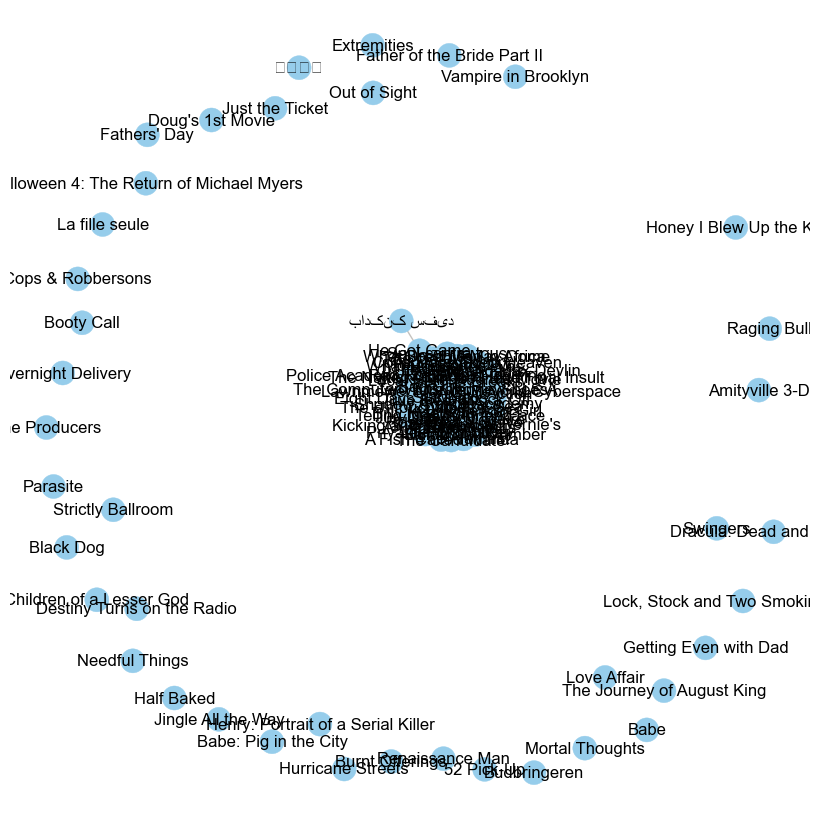

Cluster 26: ['Heat', 'Angels and Insects', 'Bottle Rocket', 'The Addiction', 'The Doom Generation', "White Man's Burden", 'Утомлённые солнцем', 'Don Juan DeMarco', 'Priest', 'The Shawshank Redemption', 'Life of Brian', 'Glory Daze', 'I bambini ci guardano', 'The Grifters', 'The Third Man', 'Trust', 'Dead Poets Society', 'Female Perversions', 'The Believers', 'The Mirror Has Two Faces', "The Preacher's Wife", "J'ai pas sommeil", 'Love! Valour! Compassion!', 'One Eight Seven', 'The Game', 'Other Voices Other Rooms', 'Shooting Fish', 'City of Angels', 'Bulworth', 'Henry Fool', 'Going My Way', 'Oliver!', 'The Exorcist', 'Exorcist II: The Heretic', 'The Godfather: Part III', 'Disturbing Behavior', 'The Happiest Millionaire', 'Il portiere di notte', 'Dead Man on Campus', 'Downhill', 'My Bodyguard', 'Class', 'Say Anything...', 'Nothing but Trouble', "A Soldier's Daughter Never Cries", 'Somewhere in the City', 'If....', 'Orgazmo', 'Mass Appeal', 'The Karate Kid', 'My Name Is Joe', 'Analyze Thi

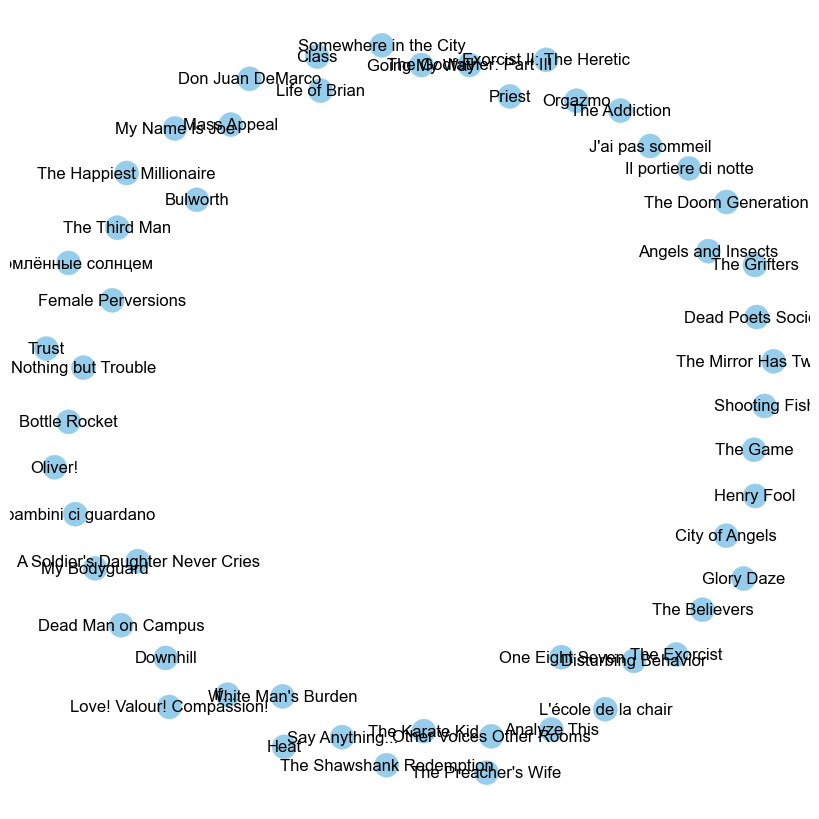

Cluster 32: ['Sabrina', 'Pocahontas', 'Georgia', 'If Lucy Fell', 'Jeffrey', 'Kids', 'Mad Love', 'Mute Witness', 'The Net', 'Nine Months', 'The Tie That Binds', 'Three Wishes', 'Unstrung Heroes', 'The Cure', 'Castle Freak', 'Dream Man', 'Dolores Claiborne', 'French Kiss', 'Milk Money', 'Miracle on 34th Street', 'Miami Rhapsody', 'Only You', 'Relative Fear', 'The Santa Clause', 'The Underneath', 'While You Were Sleeping', 'Four Weddings and a Funeral', 'Blink', 'Boxing Helena', 'The Favor', 'Go Fish', 'Malice', 'Tsuma', 'Tsuma', 'The Innocents', 'Children of the Corn IV: The Gathering', 'The Associate', 'On Golden Pond', 'Carrie', 'Breaking the Waves', 'The Cement Garden', 'Kama Sutra - A Tale of Love', 'Shall we ダンス?', 'Addicted to Love', 'The Last Time I Committed Suicide', 'Picture Perfect', 'Chasing Amy', 'How to Be a Player', 'The House of Yes', 'Washington Square', "Eve's Bayou", 'Nénette et Boni', 'The Tango Lesson', 'Guy', 'Ma vie en rose', 'Music from Another Room', 'The Wedding

C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12480 (\N{KATAKANA LETTER DA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


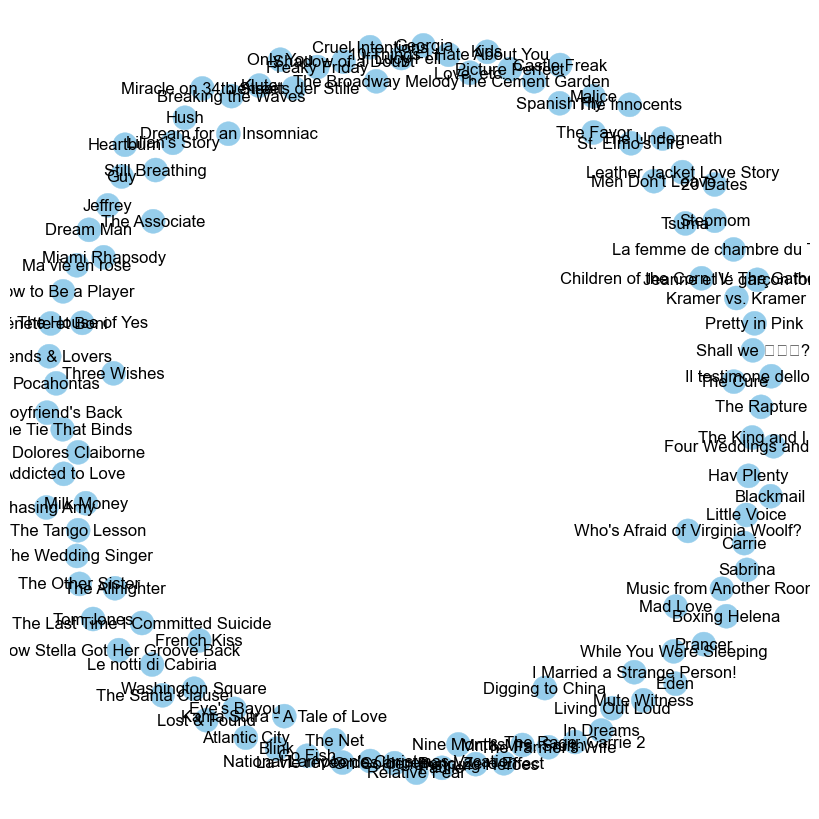

Cluster 16: ['Tom and Huck', 'Get Shorty', 'Il postino', "Things to Do in Denver When You're Dead", 'Dunston Checks In', 'Happy Gilmore', 'Die Hard: With a Vengeance', 'Swimming with Sharks', 'Ace Ventura: Pet Detective', 'Bullets Over Broadway', 'The Flintstones', 'Ri¢hie Ri¢h', 'House Party 3', 'Jimmy Hollywood', 'Last Action Hero', 'Lightning Jack', 'Days of Thunder', 'Top Gun', 'Johnny cien pesos', 'Psycho', 'Meet Wally Sparks', 'Waiting for Guffman', 'Fools Rush In', 'Austin Powers: International Man of Mystery', 'Breakdown', 'Speed 2: Cruise Control', 'Air Bud', 'RocketMan', 'Incognito', 'The Big Lebowski', 'Spice World', 'Suicide Kings', 'My Giant', 'An Alan Smithee Film: Burn, Hollywood, Burn', 'Kurt & Courtney', 'Rocky', "Billy's Hollywood Screen Kiss", 'The Barefoot Executive', 'D2: The Mighty Ducks', 'Adventures in Babysitting', 'The Nutty Professor', 'Stars & Bars', 'Toys', 'Indecent Proposal', 'Six-String Samurai', 'Holy Man', 'The Waterboy', 'Fletch', 'Trick or Treat', 'T

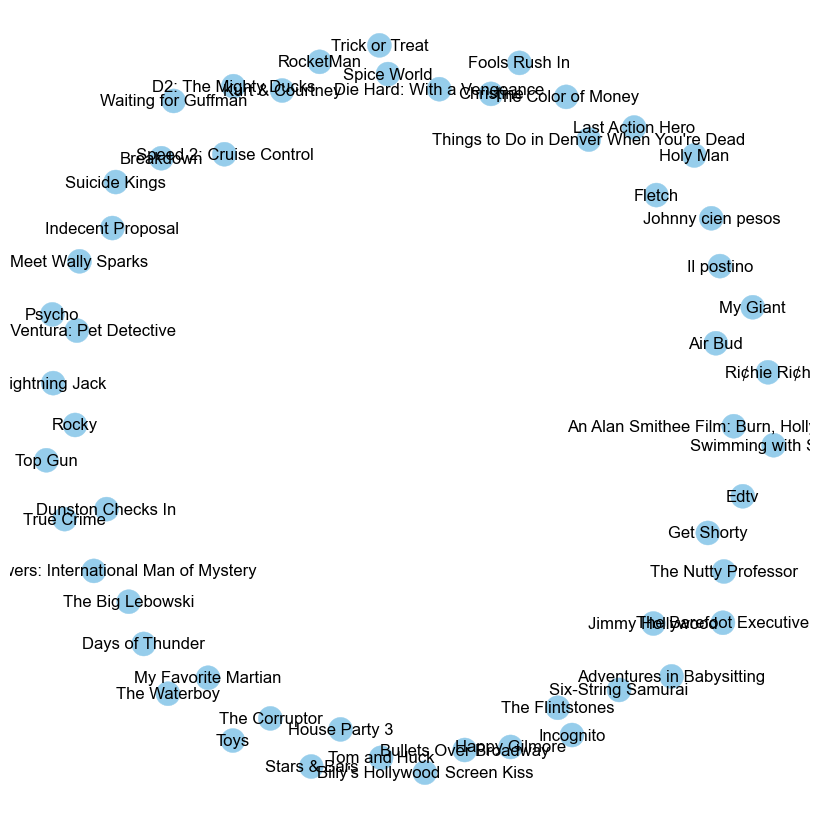

Cluster 17: ['Sudden Death', 'Free Willy 2 - The Adventure Home', 'The Perez Family', 'Trois couleurs : Blanc', 'Star Trek: Generations', 'S.F.W.', 'Body Snatchers', 'In the Line of Fire', 'The Crying Game', 'The Great Dictator', 'Indiana Jones and the Last Crusade', 'Star Trek V: The Final Frontier', 'Star Trek III: The Search for Spock', 'Under Siege', 'Metro', "McHale's Navy", 'Touch', 'City of Industry', 'The Saint', 'Spawn', 'Kiss the Girls', 'The Assignment', 'Playing God', 'Amistad', 'Firestorm', 'O Que é Isso, Companheiro?', 'U.S. Marshals', 'Species II', 'Les Misérables', 'Insomnia', 'Passion in the Desert', 'On the Waterfront', 'The Mask of Zorro', 'Saving Private Ryan', 'Kidnapped', 'Return from Witch Mountain', 'The Avengers', 'Pasqualino Settebellezze', 'American History X', 'Police Academy 5: Assignment Miami Beach', 'First Blood', 'Rocky IV', 'Heartbreak Ridge', 'Office Space']


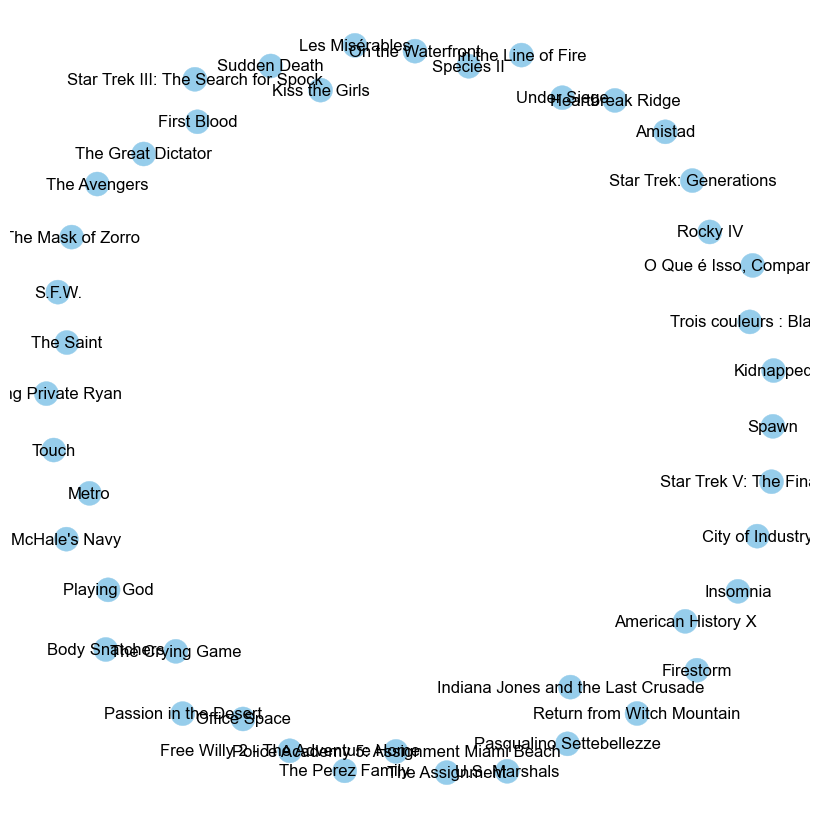

Cluster 8: ['GoldenEye', 'Kids of the Round Table', 'Star Wars', 'The Crow', 'The Mask', 'Highlander III: The Sorcerer', 'Lassie', 'Willy Wonka & the Chocolate Factory', 'Reservoir Dogs', 'A Christmas Carol', "Microcosmos : Le Peuple de l'herbe", 'The Fog', 'The Empire Strikes Back', 'The Terminator', 'Chinatown', 'Dracula', 'Jaws', 'The Lost World: Jurassic Park', 'Batman & Robin', 'Twisted', "Krippendorf's Tribe", 'Godzilla', 'Fear and Loathing in Las Vegas', 'Lethal Weapon 4', 'Mutiny on the Bounty', 'The Greatest Show on Earth', 'Friday the 13th Part VII: The New Blood', 'Halloween III: Season of the Witch', 'Lethal Weapon 3', 'Gremlins', 'The Great Mouse Detective', 'Fanny och Alexander', 'The Jungle Book', 'The Return of Jafar', 'Son of Flubber', 'Surf Nazis Must Die', 'The Fiendish Plot of Dr. Fu Manchu', 'The Impostors', 'Bride of Chucky', 'Practical Magic', 'Hard Core Logo', 'Sid & Nancy', "A Bug's Life", 'Festen', 'Crocodile Dundee', 'Il mostro']


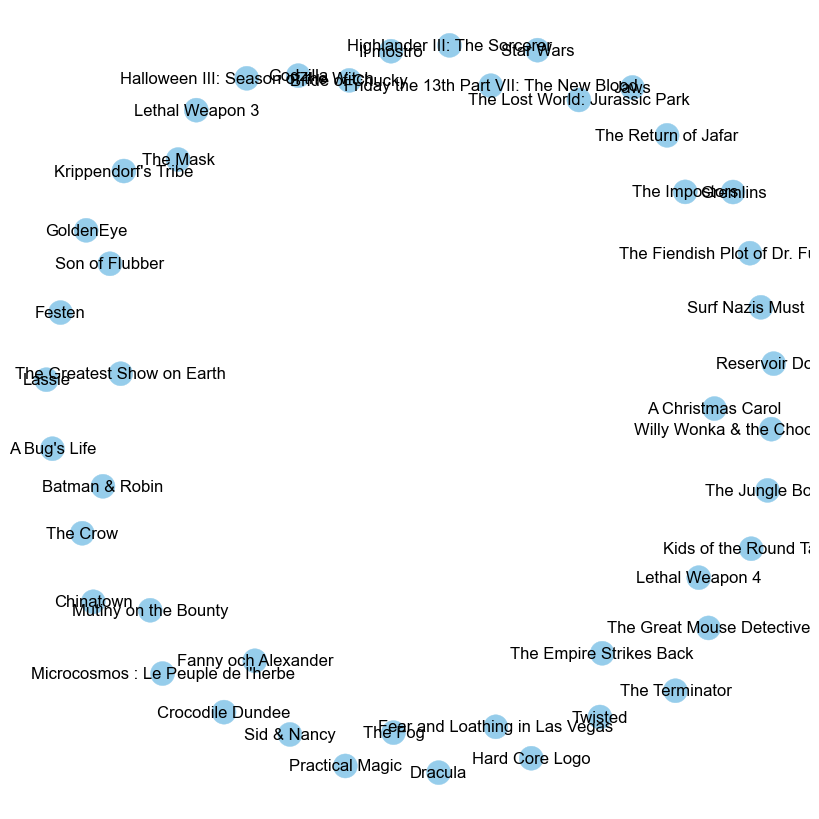

Cluster 24: ['The American President', 'La Cité des Enfants Perdus', 'Mighty Aphrodite', 'Big Bully', 'The Juror', 'Unforgettable', 'Flirting with Disaster', 'The Birdcage', 'Casper', 'Smoke', 'A Goofy Movie', 'I.Q.', "Nobody's Fool", 'The Specialist', 'Cobb', 'It Could Happen to You', 'The Lion King', 'Wolf', 'Mirage', 'Fearless', 'For Love or Money', 'Mr. Wonderful', 'Mrs. Doubtfire', 'Normal Life', 'Jude', 'The Sunchaser', "Curtis's Charm", '喋血雙雄', 'Unforgiven', 'Back to the Future', 'The Unbearable Lightness of Being', 'Field of Dreams', 'Santa with Muscles', 'Bride of Frankenstein', 'Cape Fear', 'Cape Fear', 'Marked for Death', 'La machine', 'Liar Liar', "A Brother's Kiss", 'Dream with the Fishes', 'A Simple Wish', 'Free Willy 3: The Rescue', 'Leave it to Beaver', "The Devil's Advocate", 'A Life Less Ordinary', 'Good Will Hunting', 'The Leading Man', '墮落天使', 'The Replacement Killers', 'B. Monkey', 'As Good as It Gets', 'Wild Things', 'Ratchet', 'طعم گيلاس', 'The Big Hit', 'Resurre

C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21899 (\N{CJK UNIFIED IDEOGRAPH-558B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 34880 (\N{CJK UNIFIED IDEOGRAPH-8840}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38617 (\N{CJK UNIFIED IDEOGRAPH-96D9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-

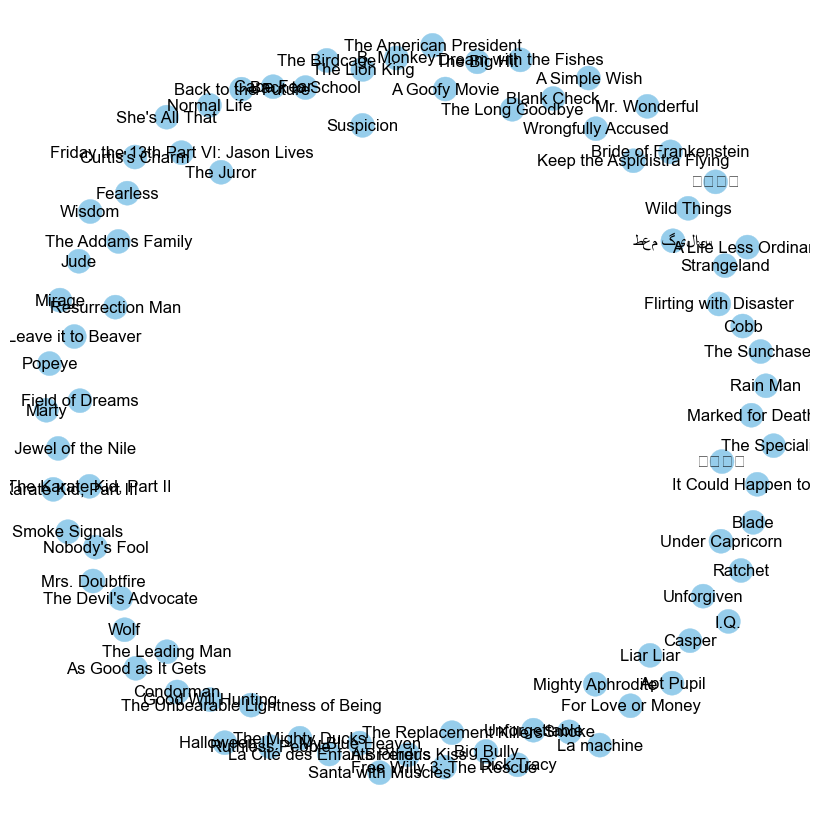

Cluster 47: ['Balto', 'Taxi Driver', 'Lord of Illusions', 'Platoon', "One Flew Over the Cuckoo's Nest", 'Il buono, il brutto, il cattivo', 'Lawrence of Arabia', 'Full Metal Jacket', 'Glory', 'Gandhi', 'The Killing Fields', 'Die Hard 2', 'Adrenalin: Fear the Rush', 'Jaws 2', 'Hearts and Minds', "Dante's Peak", 'Кавказский пленник', 'Rosewood', 'Children of the Revolution', 'Starship Troopers', 'Tomorrow Never Dies', 'Cujo', 'Ronin', 'Savior', 'The General', 'Ravenous', 'The Mummy']


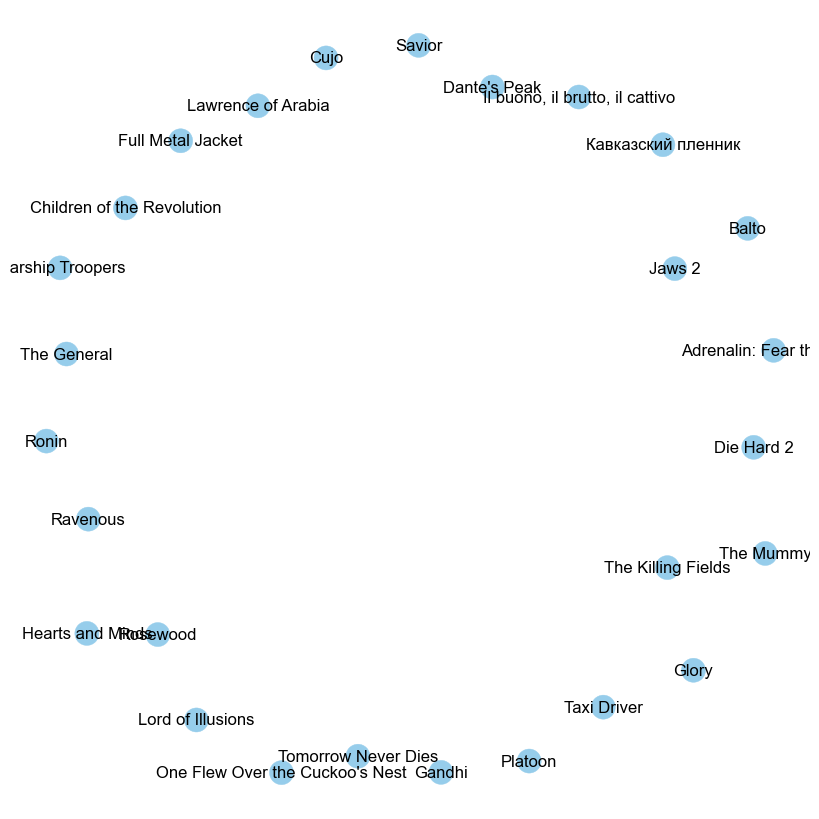

Cluster 7: ['Nixon', 'Braveheart', 'Sonic Outlaws', 'Stuart Saves His Family', 'Brother Minister: The Assassination of Malcolm X', "Widows' Peak", 'The Englishman Who Went Up a Hill But Came Down a Mountain', 'The Inkwell', 'Menace II Society', 'Bonnie and Clyde', 'The English Patient', 'GoodFellas', 'The Godfather: Part II', 'Once Upon a Time in America', 'The Right Stuff', 'Patton', 'Pink Floyd: The Wall', 'Hype!', 'Nosferatu a Venezia', 'Ghosts of Mississippi', 'Prefontaine', 'Fire on the Mountain', 'Vegas Vacation', "Smilla's Sense of Snow", 'Late Bloomers', 'Hoodlum', 'Blues Brothers 2000', 'Ayn Rand: A Sense of Life', 'Dear Jesse', 'Cavalcade', 'How Green Was My Valley', 'Mrs. Miniver', 'The Last Emperor', 'Take the Money and Run', 'Bambi', 'Fandango', 'The Rocketeer', '54', 'Without Limits', 'Velvet Goldmine', 'Gung Ho', 'Violets Are Blue', 'The Thin Red Line', 'The Hi-Lo Country', 'Conquest of the Planet of the Apes', 'Earthquake']


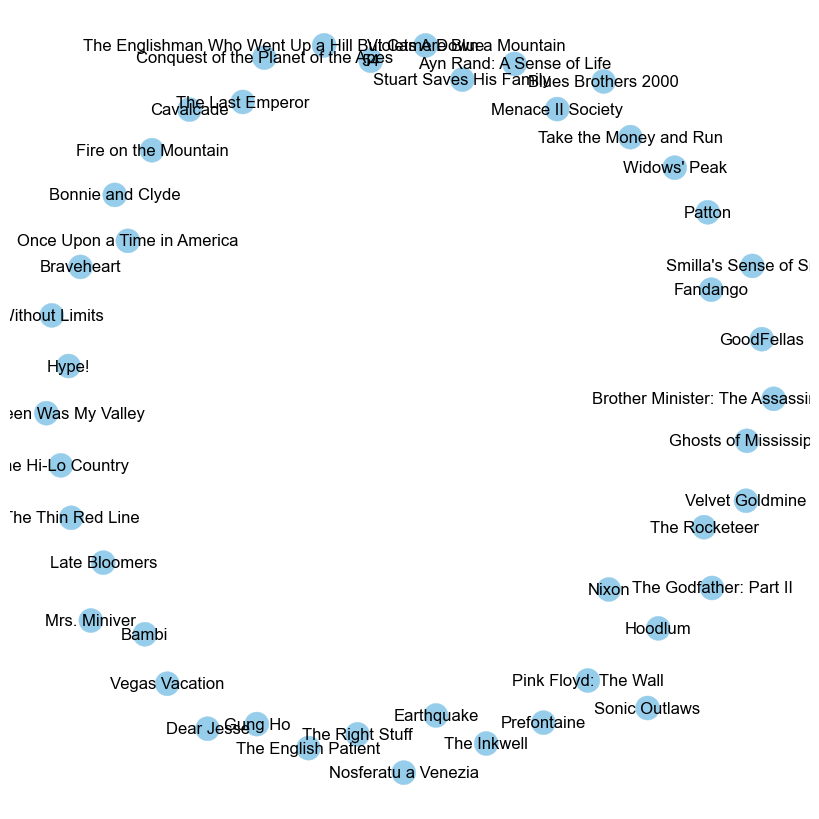

Cluster 18: ['Cutthroat Island', 'Across the Sea of Time', 'Le confessionnal', "Mr. Holland's Opus", 'Gazon maudit', 'The Crossing Guard', 'Black Sheep', 'The Stars Fell on Henrietta', 'The Browning Version', 'Forget Paris', 'Immortal Beloved', 'Ladybird Ladybird', 'Man of the House', 'Suture', 'Bitter Moon', 'Higher Learning', 'A Man of No Importance', 'Boys Life: Three Stories of Love, Lust, and Liberation', 'Le colonel Chabert', 'Dos Crímenes', 'Blue Chips', 'Blue Sky', 'Dangerous Game', 'Dazed and Confused', 'Naked', 'Le huitième jour', 'Drunks', 'Le Retour de Martin Guerre', 'Die Blechtrommel', 'Bad Moon', 'Nuovo Cinema Paradiso', 'My Left Foot: The Story of Christy Brown', 'Harold and Maude', 'Det sjunde inseglet', 'Groundhog Day', 'Pump up the Volume', 'Arsenic and Old Lace', 'Highlander', 'Somewhere in Time', 'Being There', 'Breathing Room', 'Blue Juice', 'The Amityville Horror', 'Shine', 'Identificazione di una donna', 'The Substance of Fire', 'Mother', 'Falling in Love Again'

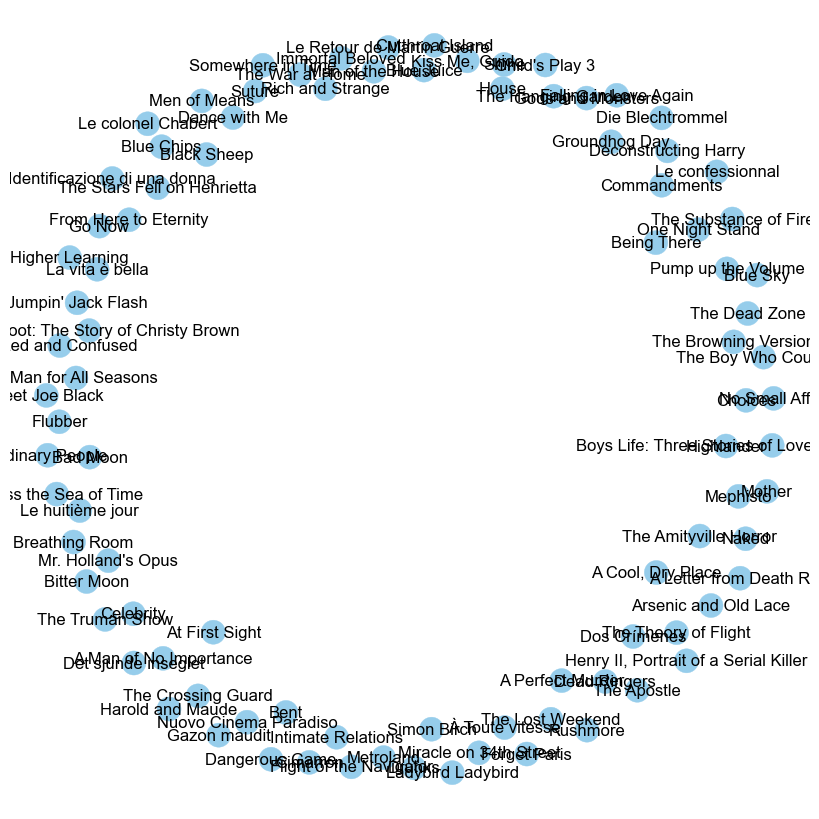

Cluster 6: ['Casino']


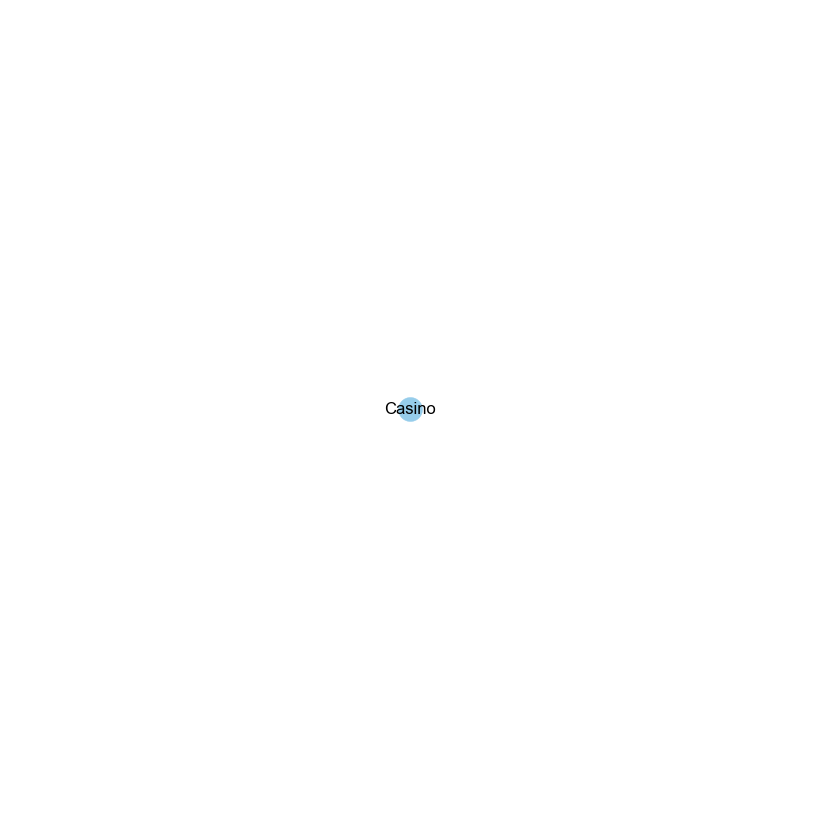

Cluster 46: ['Sense and Sensibility', 'Persuasion', 'Restoration', 'First Knight', 'Frankenstein', 'Once Were Warriors', 'The Sum of Us', 'Tom & Viv', "What's Eating Gilbert Grape", "City Slickers II: The Legend of Curly's Gold", '霸王别姬', 'La vie sexuelle des Belges 1950-1978', 'The Ruling Class', 'Hear My Song', 'Better Off Dead...', 'Evil Dead II', 'Young Frankenstein', 'The Omen', 'La Cérémonie', 'The Evening Star', 'Les voleurs', 'Hotel de Love', 'Jungle 2 Jungle', 'Hollow Reed', 'Traveller', 'Feng yue', 'Broken English', 'The Turning', 'Head Above Water', 'George of the Jungle', 'Stripes', 'Artemisia', 'The Education of Little Tree', 'Nil by Mouth', 'Karakter', 'A Nightmare on Elm Street 4: The Dream Master', 'Hello Mary Lou: Prom Night II', 'Prom Night III: The Last Kiss', 'Poltergeist III', 'The Purple Rose of Cairo', 'The Trip to Bountiful', 'Song of the South', 'Höstsonaten', 'House II: The Second Story', 'Married to the Mob', 'Blame It on Rio', 'Clay Pigeons', 'Stardust Memori

C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38712 (\N{CJK UNIFIED IDEOGRAPH-9738}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21035 (\N{CJK UNIFIED IDEOGRAPH-522B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23020 (\N{CJK UNIFIED IDEOGRAPH-59EC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-

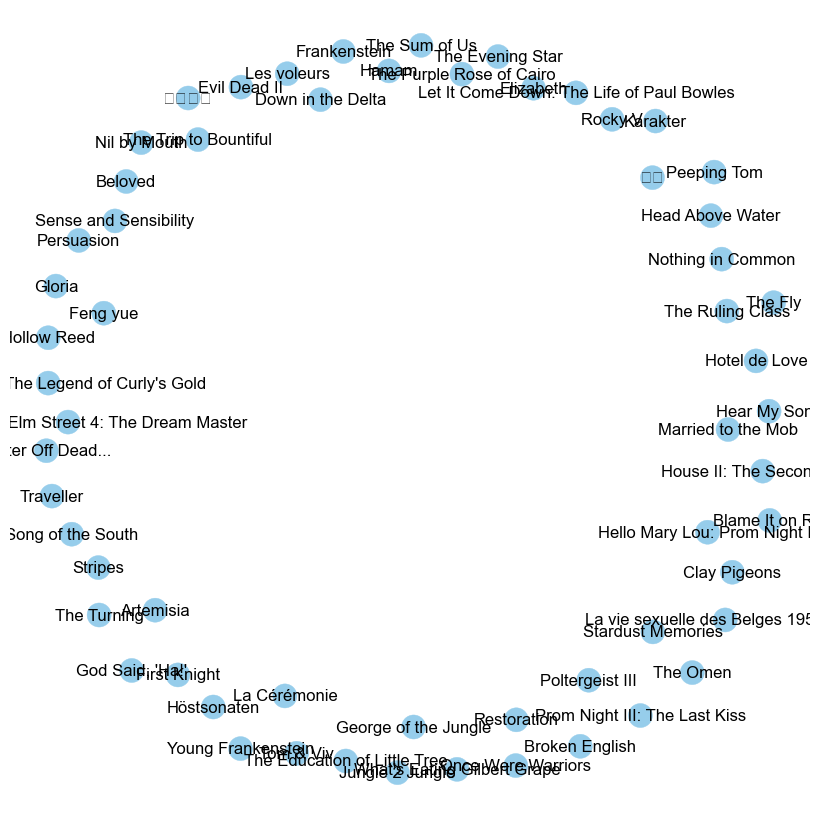

Cluster 39: ['Four Rooms', 'Bio-Dome', 'Once Upon a Time... When We Were Colored', "A Midwinter's Tale", 'Angela', 'Living in Oblivion', 'The Show', 'Senior Trip', 'Village of the Damned', 'Forrest Gump', 'Clean Slate', 'North', 'American Strays', 'The Leopard Son', 'The Sleepover', 'Entertaining Angels - The Dorothy Day Story', "Deux ou trois choses que je sais d'elle", 'The Shooter', 'A Grand Day Out', "Miller's Crossing", '大红灯笼高高挂', 'When Harry Met Sally...', "Amityville: It's About Time", 'Blood Beach', 'Message to Love: The Isle of Wight Festival', 'Rhyme & Reason', "The Devil's Own", 'Love and Other Catastrophes', 'For Ever Mozart', 'A Thousand Acres', 'Phantoms', 'The Man Who Knew Too Little', 'The Winter Guest', 'Ride', 'A Paralyzing Fear: The Story of Polio in America', "I Love You, Don't Touch Me!", 'The Best Years of Our Lives', 'Dune', 'BASEketball', 'Newsies', 'L.A. Story', "Charlotte's Web", 'An American Tail: Fievel Goes West', 'Strike!', 'The Trouble with Harry', 'Juno 

C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32418 (\N{CJK UNIFIED IDEOGRAPH-7EA2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 28783 (\N{CJK UNIFIED IDEOGRAPH-706F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-

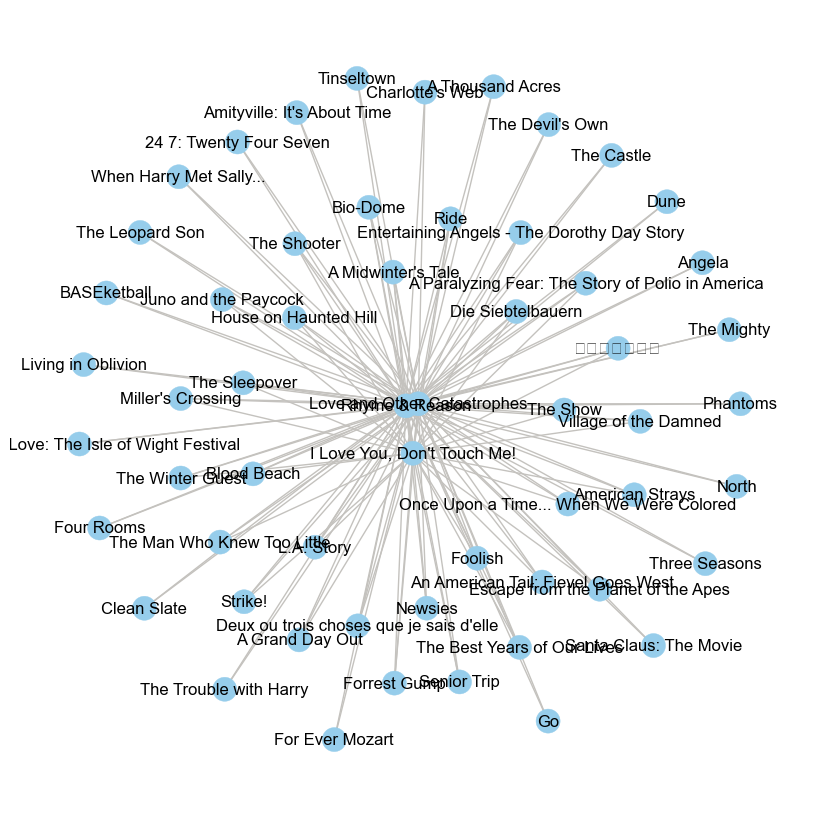

Cluster 34: ['Ace Ventura: When Nature Calls', 'Othello', 'صمت القصور', 'The Scarlet Letter', "A Kid in King Arthur's Court", 'Pushing Hands', 'La Reine Margot', 'Orlando', 'E.T. the Extra-Terrestrial', 'The Return of the Pink Panther', 'Monty Python and the Holy Grail', 'Return of the Jedi', 'Cat People', 'Star Trek II: The Wrath of Khan', 'Shekvarebuli kulinaris ataserti retsepti', 'Warriors of Virtue', 'Hercules', 'Conan the Barbarian', 'Kull the Conqueror', 'My Own Private Idaho', 'Seven Years in Tibet', 'Wishmaster', 'Anastasia', 'Kundun', 'The Man in the Iron Mask', 'The Odd Couple II', 'Prince Valiant', 'Tarzan and the Lost City', 'Quest for Camelot', 'The Last Temptation of Christ', "Jane Austen's Mafia!", 'The Black Cauldron', 'Tall Tale', 'Indiana Jones and the Temple of Doom', 'The Lord of the Rings', 'The Neverending Story', 'Waking Ned', 'Kingu Kongu tai Gojira', 'The Emerald Forest', 'Red Sonja', 'Rocky III', 'The Gate II: Trespassers', 'The Name of the Rose', 'October Sk

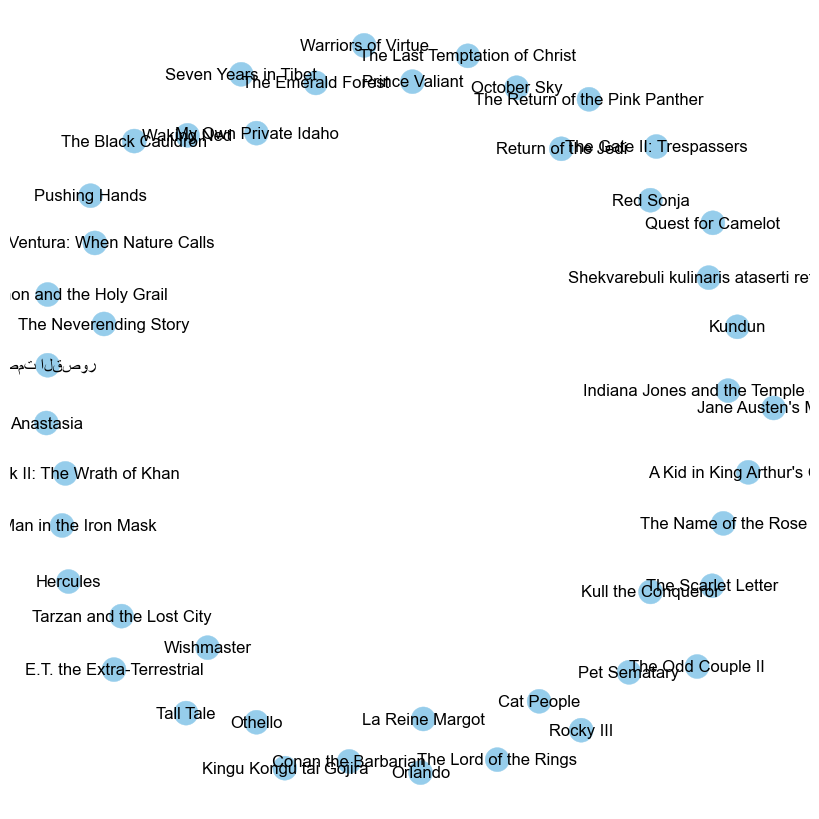

Cluster 36: ['Money Train', 'Copycat', 'The Usual Suspects', 'City Hall', 'Judge Dredd', 'Clear and Present Danger', 'Demolition Man', 'Sleepers', 'He Walked by Night', 'T-Men', 'The Thin Blue Line', 'The Sting', 'Touch of Evil', 'M', 'The Body Snatcher', 'Paradise Lost: The Child Murders at Robin Hood Hills', 'Donnie Brasco', 'Rough Magic', 'L.A. Confidential', 'The Jackal', 'Stranger in the House', 'Fallen', 'The Night Flier', 'Twilight', 'はなび', 'In the Heat of the Night', 'The French Connection', 'Lethal Weapon', 'Soylent Green', 'Snake Eyes', 'The Pope of Greenwich Village', 'Enemy of the State', 'Affliction']


C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12399 (\N{HIRAGANA LETTER HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12394 (\N{HIRAGANA LETTER NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12403 (\N{HIRAGANA LETTER BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


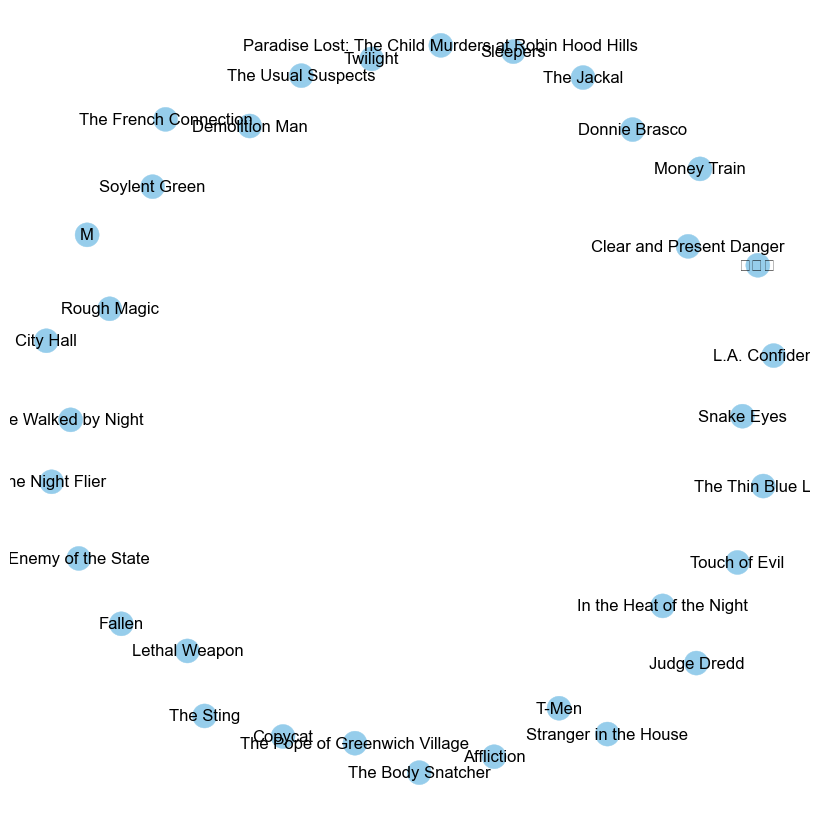

Cluster 30: ['Assassins', 'Dangerous Minds', 'Cry, the Beloved Country', '紅番區', 'Boomerang', 'Nueba Yol', 'Amateur', 'Clockers', 'Devil in a Blue Dress', 'Kiss of Death', 'Major Payne', 'Murder in the First', 'Léon', "A Pyromaniac's Love Story", 'Tommy Boy', 'Maverick', 'Speed', 'Timecop', 'Coldblooded', 'The Air Up There', 'Dave', 'Fresh', 'Killing Zoe', 'The Piano', 'Radioland Murders', 'The Wrong Trousers', 'Raw Deal', "I'm Not Rappaport", 'Nightwatch', '警察故事4之簡單任務', 'Underworld', 'Amos & Andrew', 'That Darn Cat', 'Grosse Pointe Blank', 'Keys to Tulsa', 'Truth or Consequences, N.M.', 'Mondo', 'G.I. Jane', 'Desperate Measures', 'Excess Baggage', 'Mad City', 'The Rainmaker', 'Jackie Brown', 'Tokyo Fist', 'A Further Gesture', 'The Gingerbread Man', '一個好人', 'Clockwatchers', 'Little Boy Blue', 'I Went Down', "There's Something About Mary", 'Repo Man', 'Friday the 13th: The Final Chapter', 'The Million Dollar Duck', 'Out of the Past', 'Lady and the Tramp', 'The Shaggy D.A.', 'Graveyard Sh

C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32005 (\N{CJK UNIFIED IDEOGRAPH-7D05}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30058 (\N{CJK UNIFIED IDEOGRAPH-756A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21312 (\N{CJK UNIFIED IDEOGRAPH-5340}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-

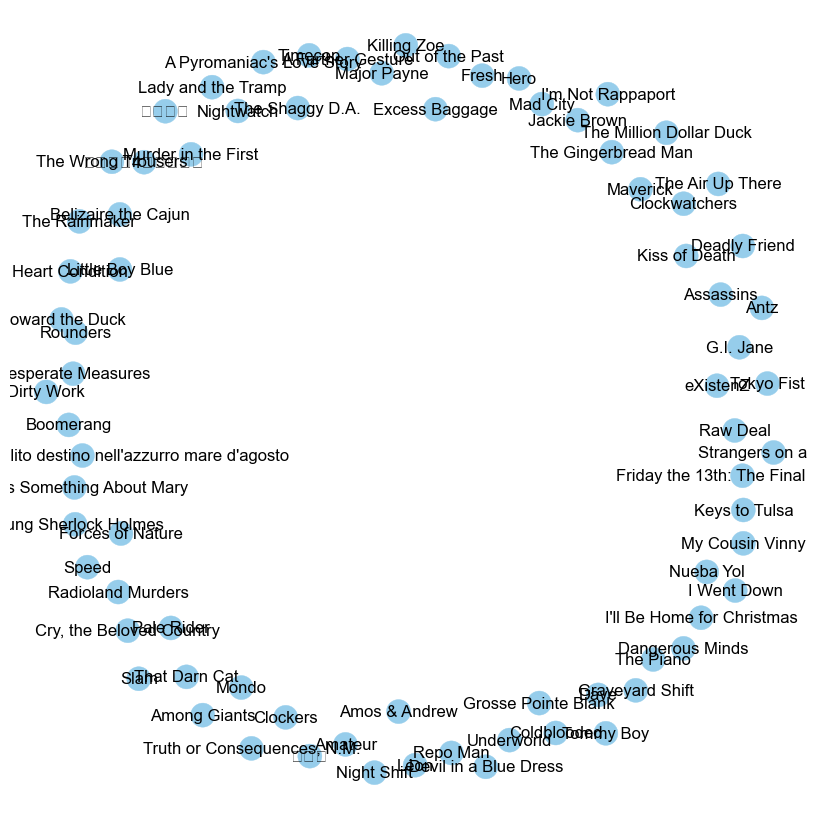

Cluster 43: ['Leaving Las Vegas', 'How To Make An American Quilt', 'Eye for an Eye', 'The Bridges of Madison County', "Jupiter's Wife", 'Beyond Rangoon', 'Something to Talk About', 'The Babysitter', 'Circle of Friends', 'Heavenly Creatures', 'Jefferson in Paris', 'Heaven & Earth', "What's Love Got to Do with It", 'A Damsel in Distress', 'Murder, My Sweet', "Sophie's Choice", 'The Quiet Man', 'Annie Hall', 'A Room with a View', 'In Love and War', 'Sprung', "My Best Friend's Wedding", 'Le Mépris', 'Soul Food', 'Swept from the Sea', 'Titanic', 'Love and Death on Long Island', 'The Proposition', 'Mr. Jealousy', 'Polish Wedding', 'Déjà Vu', 'Easy Virtue', 'The Ring', 'Permanent Midnight', 'I Still Know What You Did Last Summer', 'The Stepford Wives', 'Pink Flamingos', 'Mighty Joe Young', 'Playing by Heart', 'Crocodile Dundee II', 'Soul Man', 'The Winslow Boy']


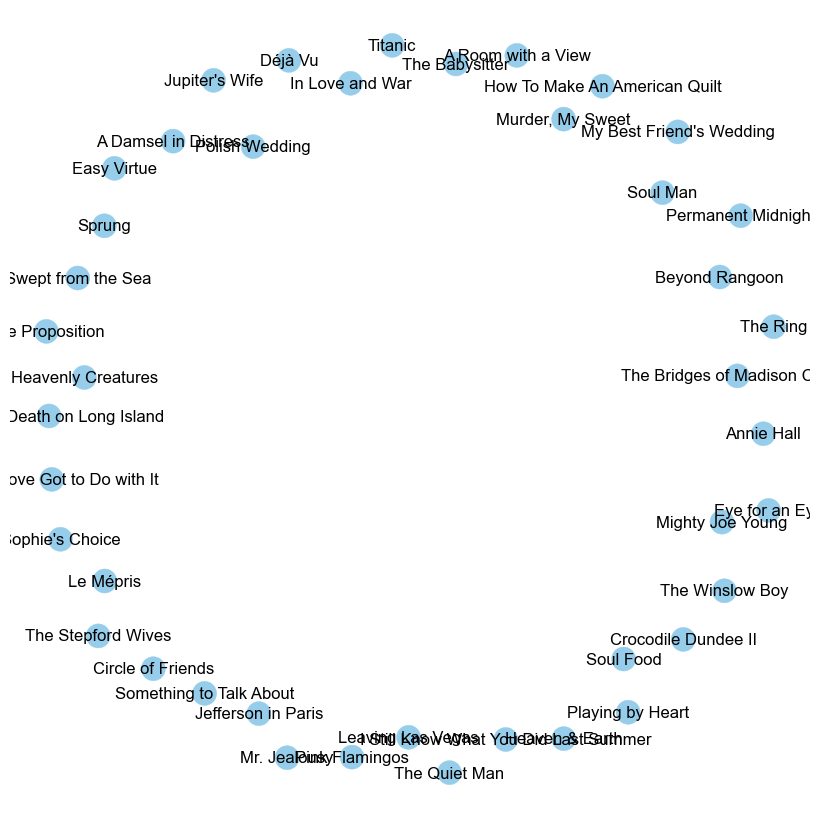

Cluster 40: ['Now and Then', 'White Squall', 'La Haine', "L'Enfer", 'Natural Born Killers', '活着', 'The Princess Bride', 'The Amityville Curse', 'Blood for Dracula', 'The Quiet Room', 'MURDER and murder', "Ulee's Gold", 'Two Girls and a Guy', 'Love Walked In', 'Lawn Dogs', 'Slums of Beverly Hills', 'The Sheltering Sky']


C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27963 (\N{CJK UNIFIED IDEOGRAPH-6D3B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30528 (\N{CJK UNIFIED IDEOGRAPH-7740}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


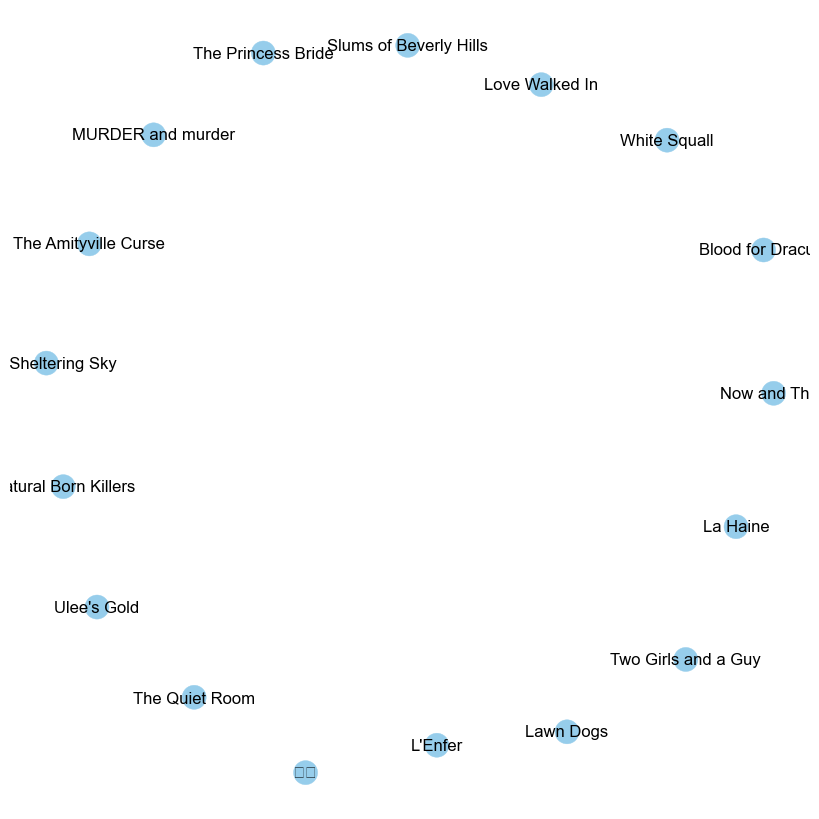

Cluster 4: ['摇啊摇，摇到外婆桥', 'Desperado', 'Feast of July', 'Before Sunrise', 'Houseguest', 'The Hunted', 'Little Odessa', 'The Quick and the Dead', 'Tales from the Crypt: Demon Knight', 'Above the Rim', 'The Age of Innocence', 'A Perfect World', 'Azúcar amarga', 'Bananas', 'The Bloody Child', 'Nikita', 'Stand by Me', 'The Manchurian Candidate', 'Chairman of the Board', 'Mr. Magoo', 'Jamaica Inn', 'Number Seventeen', 'The Skin Game', 'The Manxman', 'Reach The Rock', 'Glen or Glenda']


C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25671 (\N{CJK UNIFIED IDEOGRAPH-6447}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21834 (\N{CJK UNIFIED IDEOGRAPH-554A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Py

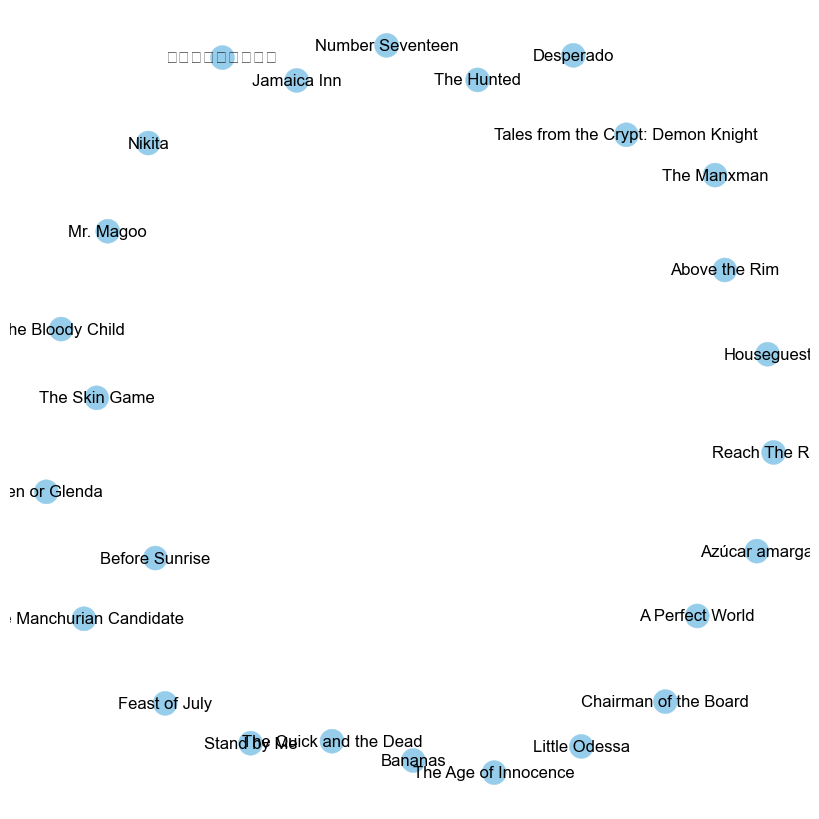

Cluster 20: ['Twelve Monkeys', 'Lamerica', 'Down Periscope', 'Crimson Tide', 'Hackers', 'Johnny Mnemonic', 'The Prophecy', 'Under Siege 2: Dark Territory', 'Bushwhacked', 'New York Cop', 'Outbreak', 'Bad Company', 'The Fear', 'Geronimo: An American Legend', 'Executive Decision', 'Philadelphia', 'Das Versprechen', 'Das Versprechen', 'American Dream', 'Paths of Glory', 'Apocalypse Now', 'Army of Darkness', '乱', 'The Bridge on the River Kwai', 'Bad Taste', 'Bis ans Ende der Welt', 'Alien³', 'Ridicule', 'Star Trek VI: The Undiscovered Country', 'Terror in a Texas Town', 'My Fellow Americans', 'Sneakers', 'Fierce Creatures', 'Turbulence', 'Anaconda', 'Face/Off', 'Air Force One', 'The Hunt for Red October', 'The Peacemaker', 'The Prophecy II', 'King of New York', 'The Spanish Prisoner', 'The Borrowers', 'Deep Impact', 'The X Files', 'Armageddon', 'Small Soldiers', 'Plan 9 from Outer Space', 'Lethal Weapon 2', '七人の侍', 'The Cat from Outer Space', 'Tron', 'The Neverending Story II: The Next Cha

C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19971 (\N{CJK UNIFIED IDEOGRAPH-4E03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20365 (\N{CJK UNIFIED IDEOGRAPH-4F8D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages

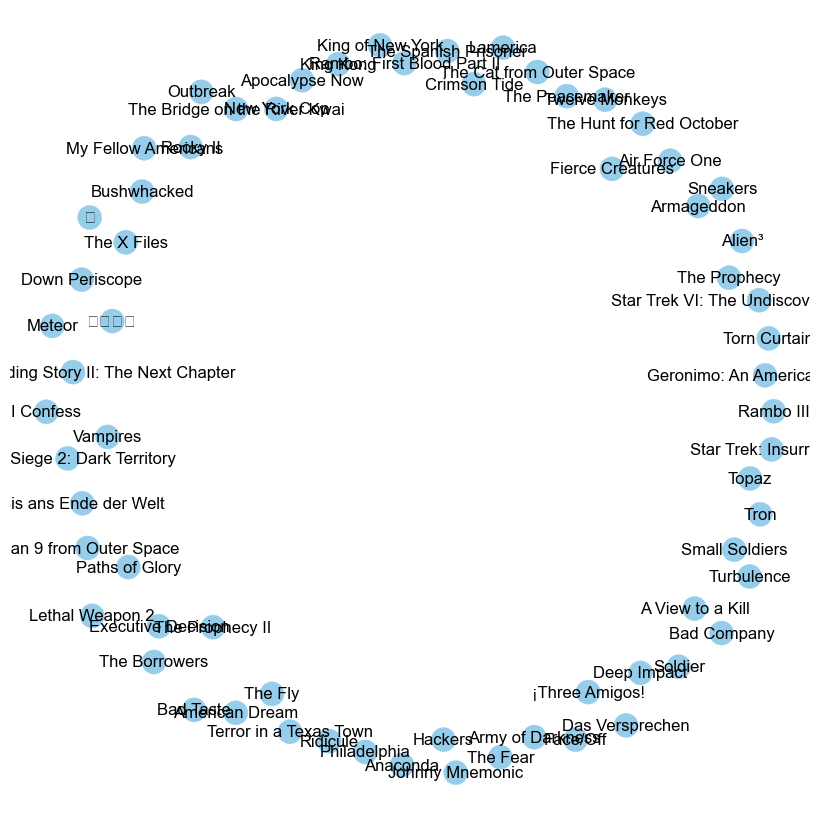

Cluster 2: ['Guillaumet, les ailes du courage', 'Roommates', 'The Proprietor', 'Bird of Prey', 'Guantanamera', 'Salut cousin !', 'The Cabinet of Dr. Ramirez', 'One Tough Cop']


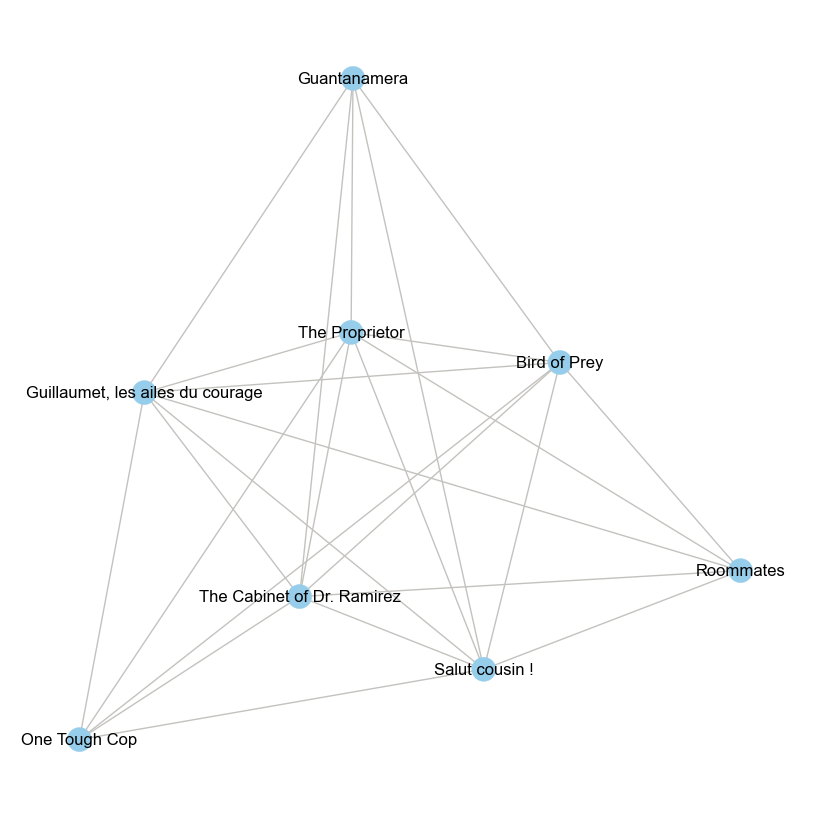

Cluster 0: ['Carrington', "Margaret's Museum", 'Frankie Starlight', 'Man of the Year', 'Up Close & Personal', 'Exotica', 'Interview with the Vampire', 'Mi Vida Loca', 'Fresa y chocolate', 'The Secret Adventures of Tom Thumb', 'In the Mouth of Madness', 'Coneheads', '愛のコリーダ', 'Trois vies et une seule mort', 'Faust', 'Delicatessen', 'La double vie de Véronique', 'To Kill a Mockingbird', "C'era una volta il West", 'Der Himmel über Berlin', '8½', 'Fantasia', 'Kjærlighetens kjøtere', 'Batman Returns', 'Mars Attacks!', 'Citizen Ruth', 'Raising Arizona', 'Scream', 'Beverly Hills Ninja', 'Love Jones', "Cats Don't Dance", 'Wedding Bell Blues', 'Fall', 'Fast, Cheap & Out of Control', 'Boogie Nights', 'Sliding Doors', 'The Postman', 'Great Expectations', 'Star Kid', 'Мать и сын', 'Little City', 'El Callejón de los Milagros', 'Wide Awake', 'Doctor Dolittle', 'A Nightmare on Elm Street 5: The Dream Child', 'The Journey of Natty Gann', 'The Little Mermaid', 'Sleeping Beauty', 'Something Wicked This 

C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24859 (\N{CJK UNIFIED IDEOGRAPH-611B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12467 (\N{KATAKANA LETTER KO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12522 (\N{KATAKANA LETTER RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python3

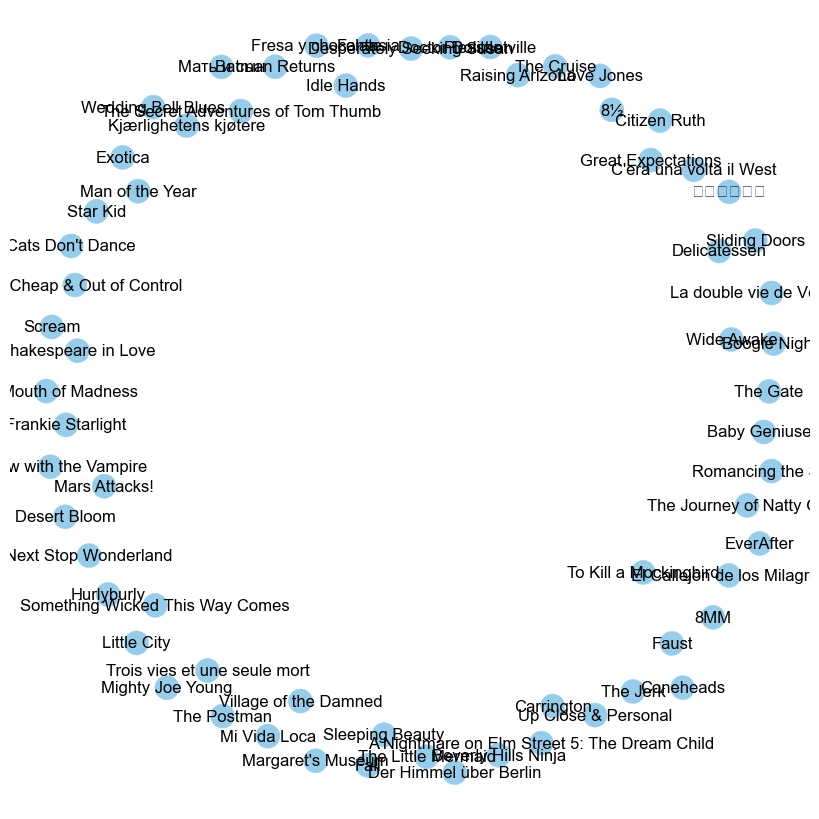

Cluster 13: ['Dead Man Walking', 'The Indian in the Cupboard', 'Le Bonheur est dans le pré', 'The Neon Bible', 'Junior', 'Losing Isaiah', 'Poison Ivy II: Lily', 'Homage', 'Mr. Jones', 'Everyone Says I Love You', 'Private Benjamin', 'Love In Bloom', 'Sex, Lies, and Videotape', '¡Átame!', 'Manhattan', 'The Graduate', 'Some Kind of Wonderful', 'Anna Karenina', 'Losing Chase', 'Le bonheur', 'En avoir (ou pas)', 'In & Out', 'A Smile Like Yours', 'Bang', 'Man of Her Dreams', 'Office Killer', 'Afterglow', 'Senseless', 'High Art', "Child's Play", 'Return to Oz', 'Splash', 'The Man with Two Brains', 'Regarde la Mer', 'Working Girl', 'Shattered Image', 'Message in a Bottle', 'Pet Sematary II', 'A Walk on the Moon', 'The Sticky Fingers of Time', 'Never Been Kissed', 'Election']


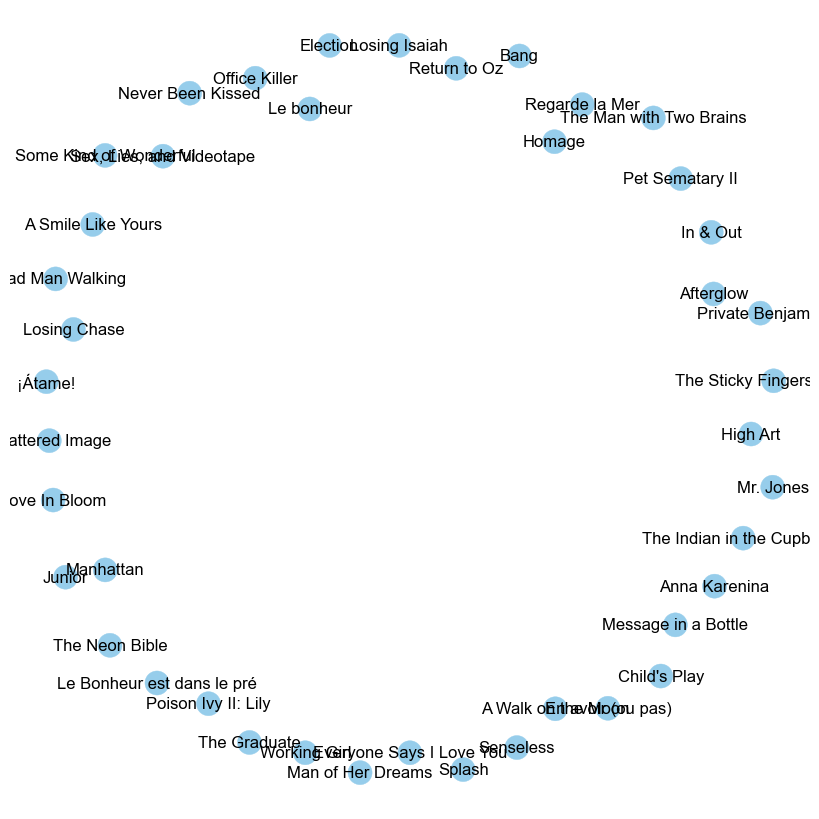

Cluster 37: ['Clueless', 'Mr. Wrong', 'Belle de jour', 'Party Girl', 'Safe', 'Como agua para chocolate', 'Picture Bride', 'Corrina, Corrina', 'I Like It Like That', "I'll Do Anything", 'Manhattan Murder Mystery', 'Victor/Victoria', 'The Portrait of a Lady', 'Zeus & Roxanne', 'Benny & Joon', 'Selena', 'Chacun Cherche Son Chat', "She's So Lovely", 'Mrs Brown', 'The Wings of the Dove', 'The Real Blonde', 'Hope Floats', 'Cousin Bette', 'The Governess', 'Le septième ciel', 'The Paradine Case', 'The Pleasure Garden', 'Home Fries', 'Peggy Sue Got Married', 'The 24 Hour Woman', 'Simply Irresistible', 'Dangerous Beauty', 'Mildred Pierce']


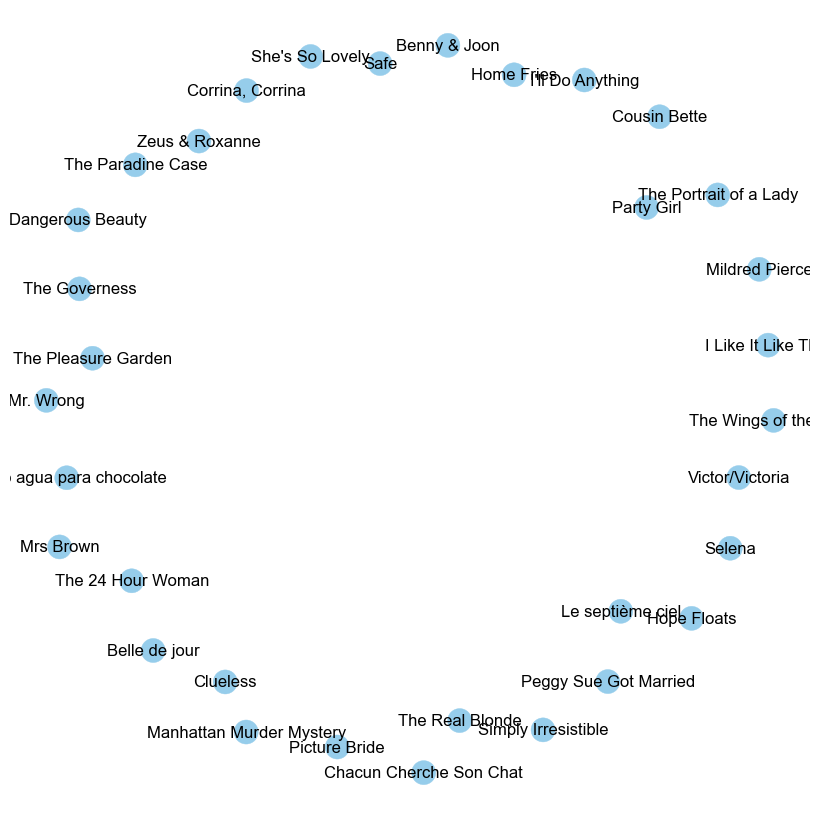

Cluster 45: ['Dead Presidents', 'Gospa', 'Tank Girl', 'The War', 'The Hudsucker Proxy', 'Poetic Justice', 'Get on the Bus', 'Crossfire', 'Macao', 'Sleeper', 'Сталкер', 'The Great Escape', 'Mad Dog Time', "Some Mother's Son", 'The Beautician and the Beast', 'SubUrbia', 'The Fifth Element', 'FairyTale: A True Story', 'Welcome to Sarajevo', 'Ill Gotten Gains', 'The Sweet Hereafter', "All the King's Men", 'West Side Story', 'Metropolis', 'And the Band Played On', 'The Outsiders', 'Watership Down', 'The Gods Must Be Crazy', 'The Navigator: A Medieval Odyssey', 'Sabotage', "One Man's Hero", 'The Siege', 'Breakfast of Champions', 'Airport', 'The Towering Inferno', 'The Matrix']


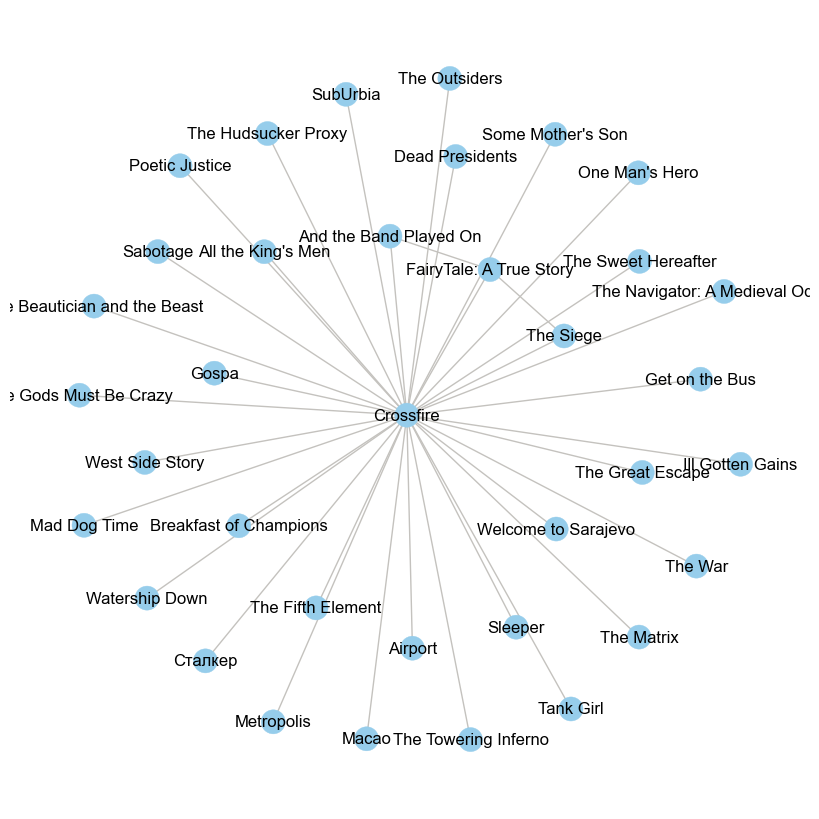

Cluster 38: ['Mortal Kombat', 'Screamers', 'The NeverEnding Story III', 'Apollo 13', 'Congo', 'Species', 'Waterworld', 'The Swan Princess', 'Stargate', 'Virtuosity', 'Being Human', 'The Puppet Masters', 'The Abyss', 'Alien', 'The Day the Earth Stood Still', 'Forbidden Planet', 'The Man Who Would Be King', 'Amityville: Dollhouse', 'The Blob', 'Star Trek: The Motion Picture', 'Jaws 3-D', 'Turbo: A Power Rangers Movie', 'Volcano', 'Mimic', 'Gattaca', 'Mortal Kombat: Annihilation', 'Alien: Resurrection', 'Time Tracers', 'Lost in Space', 'Almost Heroes', 'The Black Hole', 'The Dark Crystal', 'Legend', 'Them!', 'The Thing', '2010', 'ゴジラ', 'Lifeforce', 'A Simple Plan', 'Virus', 'Firewalker', 'La planète sauvage', 'Airport 1975', 'Rollercoaster', 'Planet of the Apes', 'Beneath the Planet of the Apes', 'Battle for the Planet of the Apes']


C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12468 (\N{KATAKANA LETTER GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12472 (\N{KATAKANA LETTER ZI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


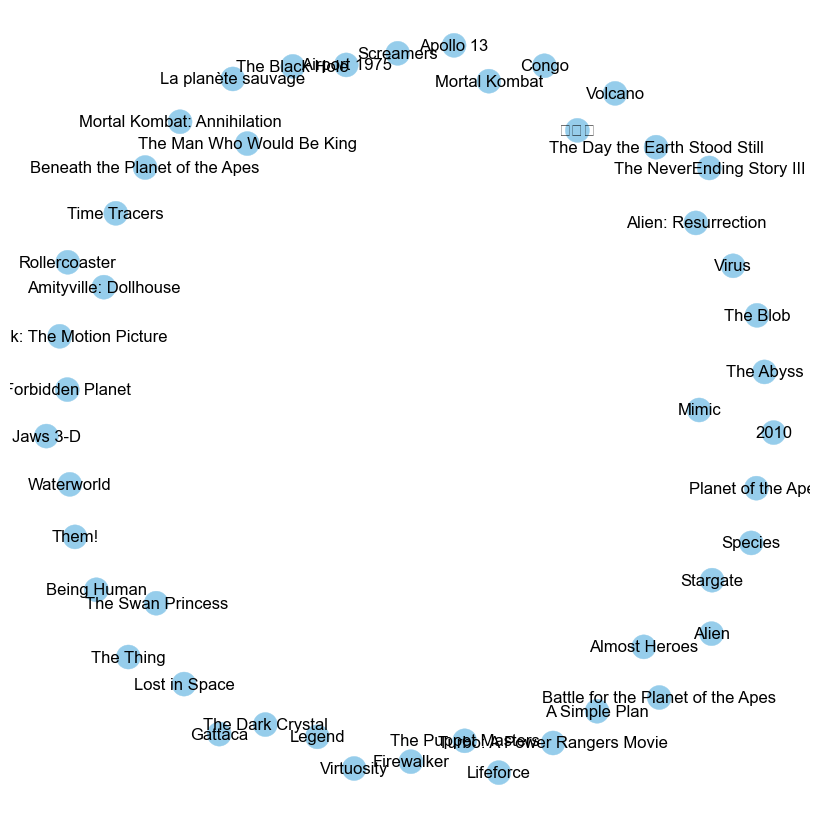

Cluster 27: ['To Die For', 'Les misérables', 'Catwalk', 'Pie in the Sky', 'From the Journals of Jean Seberg', 'Love & Human Remains', 'Nina Takes a Lover', 'Open Season', 'Martin Lawrence: You So Crazy', 'M. Butterfly', 'The People vs. Larry Flynt', 'A Perfect Candidate', 'Bob Roberts', 'Diva', 'Il Cristo proibito', 'Bastard Out of Carolina', 'Kolja', 'Tetsuo II: Body Hammer', 'Contact', 'Money Talks', 'Fire Down Below', 'Primary Colors', 'Pi', 'Driving Miss Daisy', 'Dangerous Liaisons', 'Doctor Zhivago', 'Nineteen Eighty-Four', 'Attack of the Killer Tomatoes!', 'Marnie', 'Elstree Calling', 'Broadcast News', 'The Player', 'Nashville', "You've Got Mail", 'The Deep End of the Ocean', 'Wing Commander', 'Tango, no me dejes nunca', 'Nô']


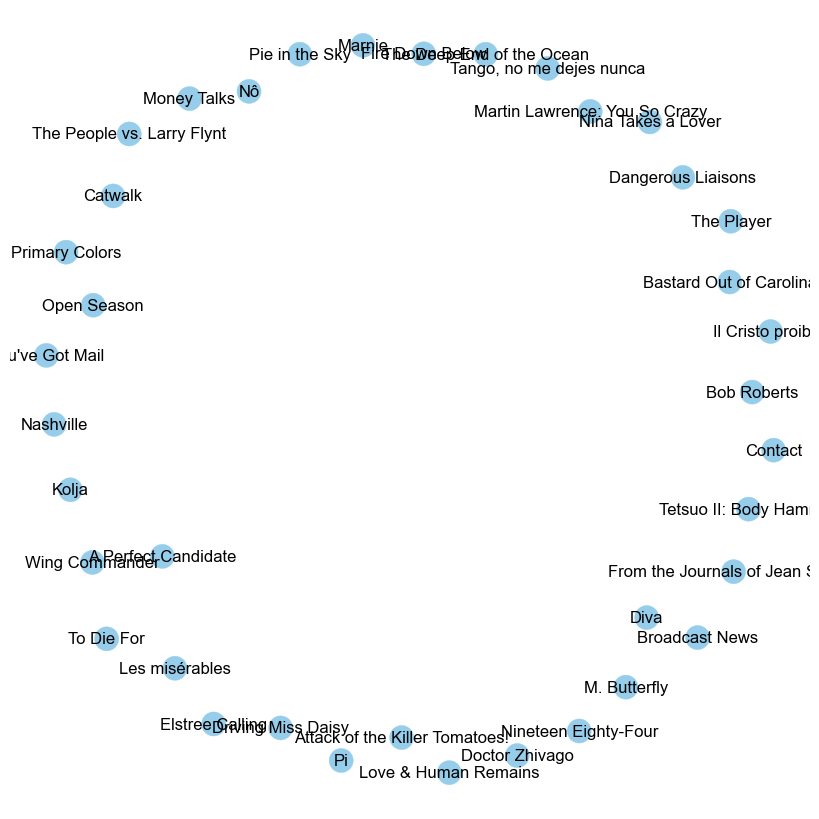

Cluster 10: ['Se7en', 'The Boys of St. Vincent', 'Jade', 'Strange Days', 'Before the Rain', 'Disclosure', 'Tales from the Hood', 'A Low Down Dirty Shame', 'Faster, Pussycat! Kill! Kill!', 'A Bronx Tale', 'Fatal Instinct', 'In the Name of the Father', 'Kalifornia', 'The Man without a Face', 'No Escape', 'The Remains of the Day', 'The Woman in Question', 'Basic Instinct', 'The Howling', 'Brazil', 'A Clockwork Orange', 'Cool Hand Luke', 'Body Parts', 'Sling Blade', 'Unforgotten: Twenty-Five Years After Willowbrook', 'Boys Life 2', 'Sudden Manhattan', 'گبه', 'Cop Land', 'Midnight in the Garden of Good and Evil', 'Dark City', 'Illtown', 'The Ugly', 'Prom Night', "Child's Play 2", 'Poltergeist II: The Other Side', 'The Exorcist III', '东宫西宫', 'Blue Velvet', "Dead Men Don't Wear Plaid", 'Frenzy', 'The Wrong Man', 'Young and Innocent', 'Young Doctors in Love', 'The Elephant Man', 'Tales from the Darkside: The Movie', 'Runaway Train', 'El día de la bestia', 'The Haunting', 'Heaven']


C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19996 (\N{CJK UNIFIED IDEOGRAPH-4E1C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23467 (\N{CJK UNIFIED IDEOGRAPH-5BAB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35199 (\N{CJK UNIFIED IDEOGRAPH-897F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


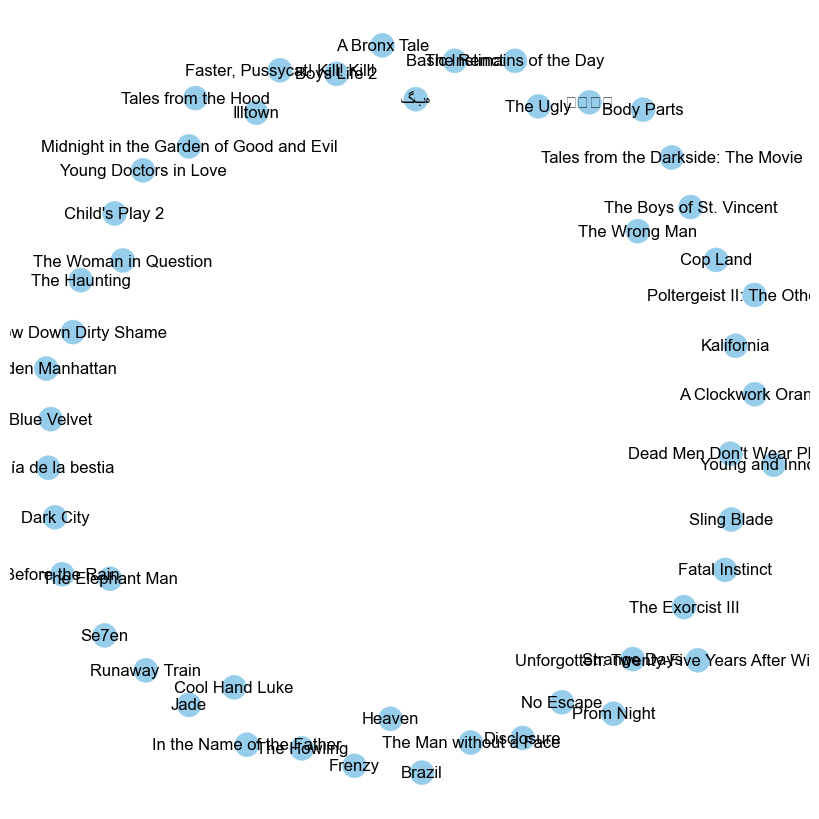

Cluster 33: ['When Night Is Falling', 'Headless Body in Topless Bar', 'Nell', 'Beyond Bedlam', "Muriel's Wedding", 'The River Wild', 'Candyman', 'Lost Highway', 'Schizopolis', 'Palmetto', 'Storefront Hitchcock', "Gentleman's Agreement", 'Family Plot', 'Bandit Queen', 'Edward Scissorhands', 'Get Real']


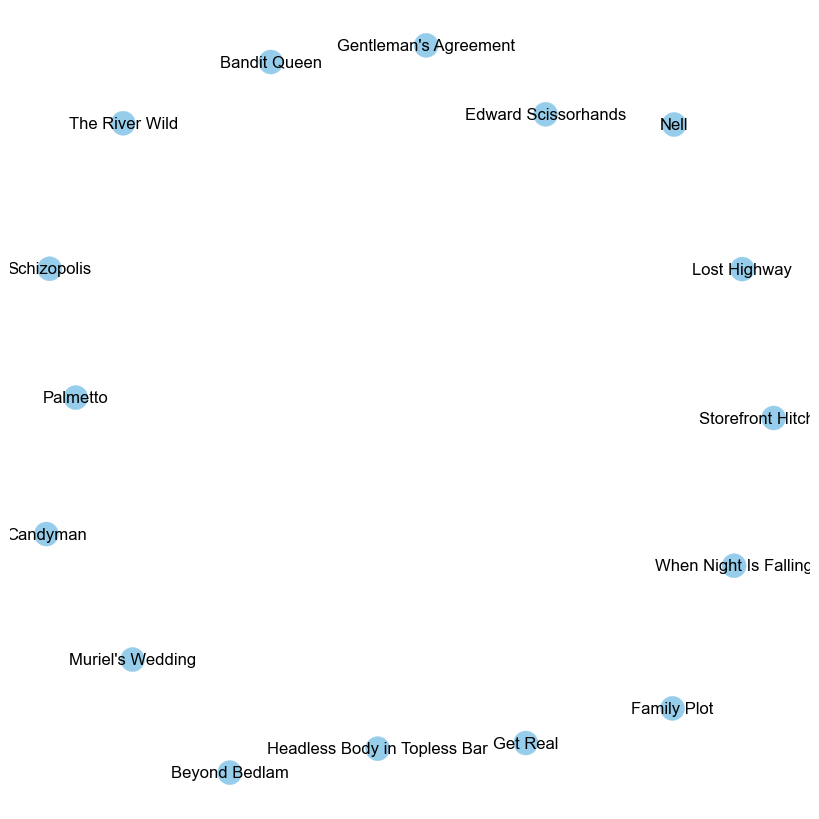

Cluster 22: ['Home for the Holidays', 'A Walk in the Clouds', 'A Little Princess', 'Trois couleurs : Bleu', 'Safe Passage', 'When a Man Loves a Woman', 'The House of the Spirits', 'The Next Karate Kid', 'Madame Butterfly', 'Drop Dead Fred', 'Here Comes Cookie', "Marvin's Room", 'Somebody Is Waiting', 'Hamlet', 'The Daytrippers', 'Ponette', 'Career Girls', 'No Looking Back', 'The Object of My Affection', 'The Players Club', "Heaven's Burning", "Buffalo '66", 'Whatever', 'Halloween 5: The Revenge of Michael Myers', 'Tender Mercies', 'Tex', 'Sixteen Candles', 'Rope', 'Champagne', "Let's Talk About Sex", 'One Crazy Summer', "The Butcher's Wife", 'One True Thing']


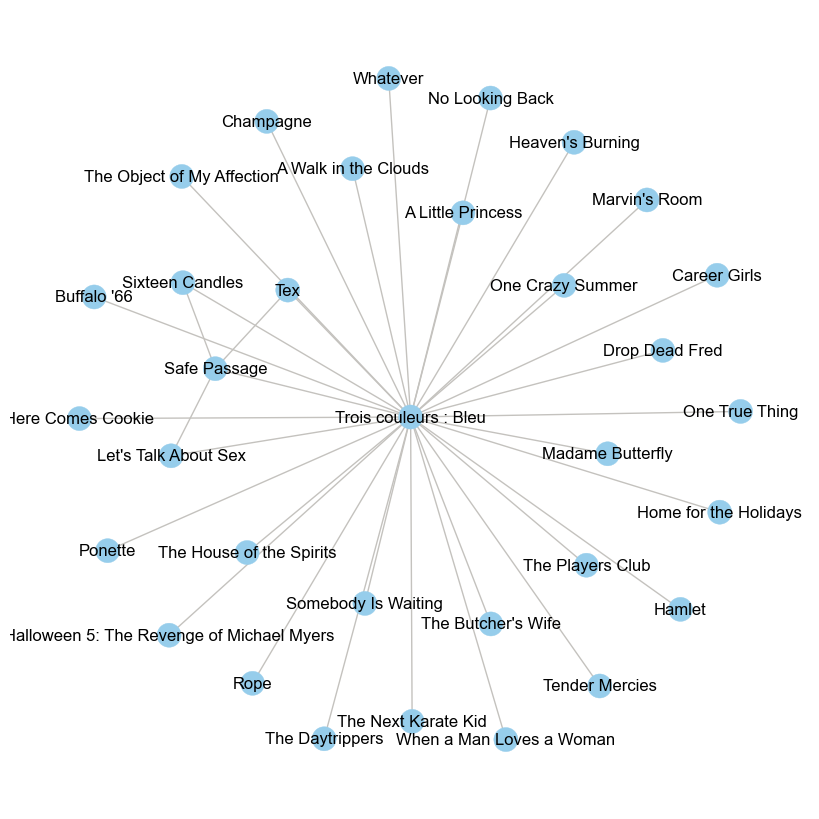

Cluster 35: ['Friday', 'From Dusk Till Dawn', 'Muppet Treasure Island', 'Bad Boys', 'Rob Roy', 'Mallrats', 'To Wong Foo, Thanks for Everything! Julie Newmar', 'Boys on the Side', 'New Jersey Drive', 'Rent-a-Kid', 'The Walking Dead', 'The Adventures of Priscilla, Queen of the Desert', 'Fall Time', 'Airheads', 'Beverly Hills Cop III', "Carlito's Way", 'Cliffhanger', 'The Cowboy Way', 'Live Nude Girls', 'Six of a Kind', 'I Shot a Man in Vegas', 'Amityville II: The Possession', "April Fool's Day", 'Albino Alligator', 'Angel Baby', "Gridlock'd", 'Best Men', 'Double Team', 'Twin Town', 'Brassed Off', 'U Turn', 'Stag', 'I Know What You Did Last Summer', 'Wonderland', 'Gang Related', 'Les Boys', 'Meet the Deedles', 'The Last Days of Disco', 'Six Days Seven Nights', 'Marie Baie des Anges', 'Friday the 13th', 'Prom Night IV: Deliver Us from Evil', 'Cheetah', 'Herbie Goes To Monte Carlo', 'Hocus Pocus', 'Maximum Overdrive', 'The Gods Must Be Crazy II', 'Return to Paradise', 'Urban Legend', 'A Nig

C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21452 (\N{CJK UNIFIED IDEOGRAPH-53CC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 40857 (\N{CJK UNIFIED IDEOGRAPH-9F99}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20250 (\N{CJK UNIFIED IDEOGRAPH-4F1A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


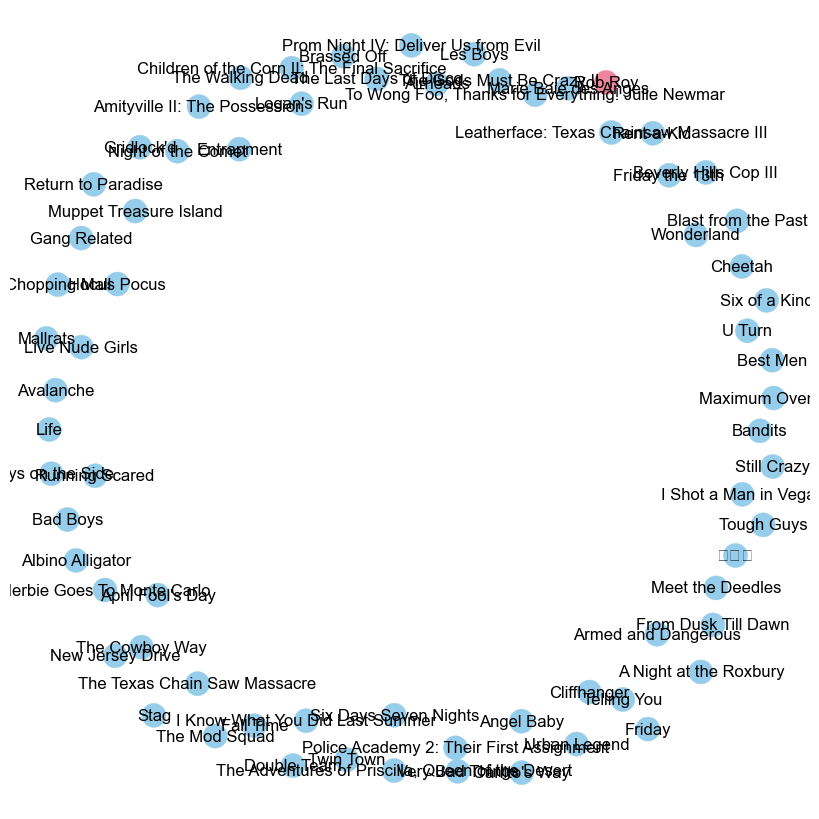

Cluster 12: ['Fair Game', 'Batman Forever', 'Amadeus', 'Duck Soup', 'Paradise Road', 'Switchback', 'Mercury Rising', 'Woo', 'Lolita', 'The Lodger: A Story of the London Fog', 'A Few Good Men', 'The Texas Chainsaw Massacre 2']


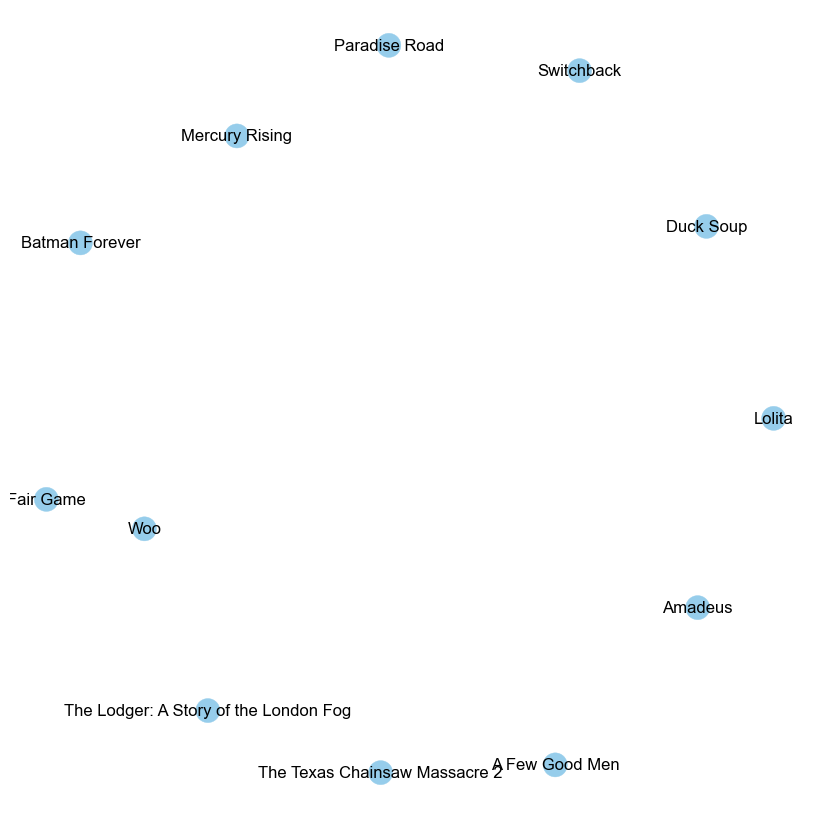

Cluster 9: ['Last Summer in the Hamptons', 'Beautiful Girls', 'Shopping', 'Race the Sun', "L'uomo delle stelle", 'The Brothers McMullen', 'Nadja', '飲食男女', 'Hoop Dreams', 'Legends of the Fall', 'Mixed Nuts', 'My Family', 'Vanya on 42nd Street', 'Federal Hill', 'Black Beauty', 'The Endless Summer 2', 'The Search for One-eye Jimmy', 'The Funeral', 'Dadetown', 'The Line King: The Al Hirschfeld Story', 'Madonna: Truth or Dare', 'Paris is Burning', 'Down by Law', 'Night on Earth', 'This Is Spinal Tap', 'Koyaanisqatsi', 'Paris Was a Woman', 'Kids of Survival', 'Grease 2', 'Inside', 'A Tickle in the Heart', 'That Old Feeling', 'Kissed', 'All Over Me', 'Wild America', 'Scream 2', 'Arguing the World', 'Everest', 'The Newton Boys', 'Little Men', 'The Land Girls', 'Picnic at Hanging Rock', 'Madeline', 'Wings', 'All Quiet on the Western Front', 'Chariots of Fire', 'Full Tilt Boogie', 'Swing Kids', 'Grand Canyon', 'Safe Men', 'Die Salzmänner von Tibet', 'Air Bud: Golden Receiver', 'Your Friends & Ne

C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39154 (\N{CJK UNIFIED IDEOGRAPH-98F2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39135 (\N{CJK UNIFIED IDEOGRAPH-98DF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30007 (\N{CJK UNIFIED IDEOGRAPH-7537}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-

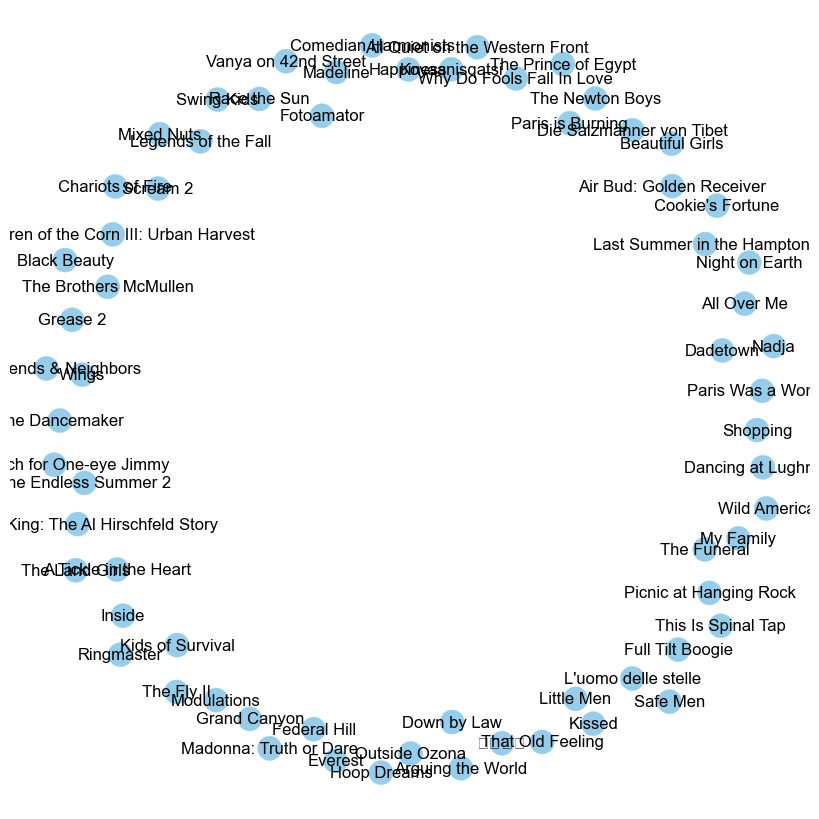

Cluster 5: ['Nick of Time', 'Canadian Bacon', 'The Glass Shield', 'Just Cause', 'The Madness of King George', 'The Client', 'The Paper', 'Barcelona', 'Blown Away', 'The Fugitive', 'King of the Hill', 'For the Moment', 'When We Were Kings', 'Raiders of the Lost Ark', '12 Angry Men', 'High Noon', 'The Big Sleep', 'Young Guns', 'Young Guns II', 'Night Falls on Manhattan', 'Michael', 'Murder at 1600', 'Absolute Power', 'The Innocent Sleep', 'The Matchmaker', 'Bean', 'Red Corner', 'Wag the Dog', 'The Negotiator', 'Roger & Me', 'Saboteur', 'Murder!', 'Rush Hour', 'Monument Ave.', 'Shadrach', 'The Battle of the Sexes', 'Detroit 9000', 'Police Academy 4: Citizens on Patrol']


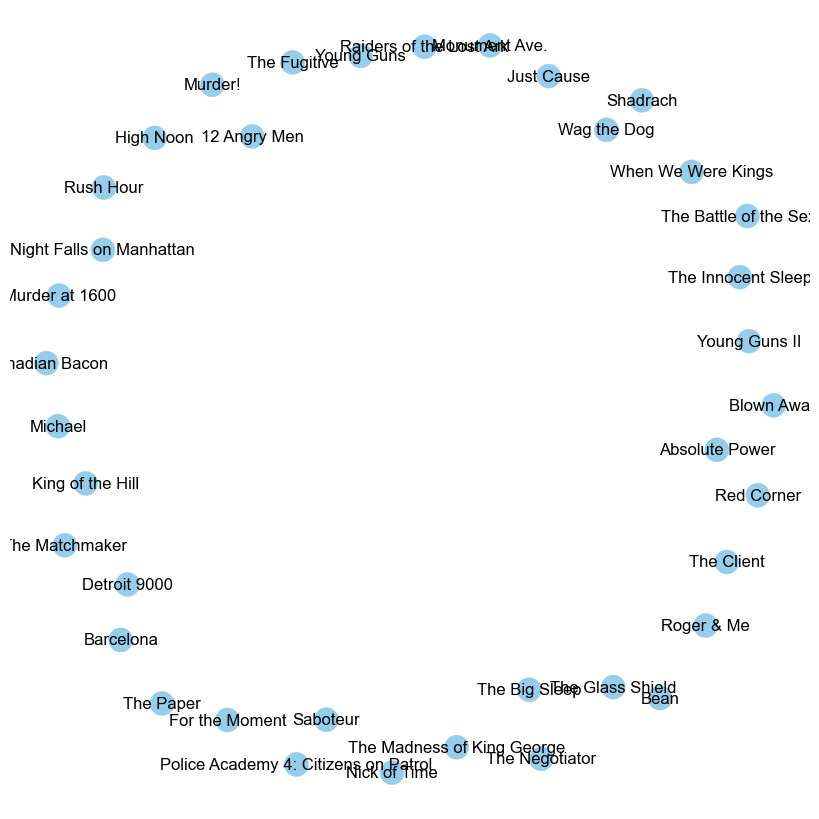

Cluster 23: ['Mary Reilly', 'Crooklyn', 'A Streetcar Named Desire', 'Fried Green Tomatoes', 'Cyrano de Bergerac', 'The Pillow Book', 'Mrs. Dalloway', 'I Love You, I Love You Not', 'The Opposite of Sex', 'Halloween', 'One Magic Christmas', 'Six Ways to Sunday', 'Hideous Kinky']


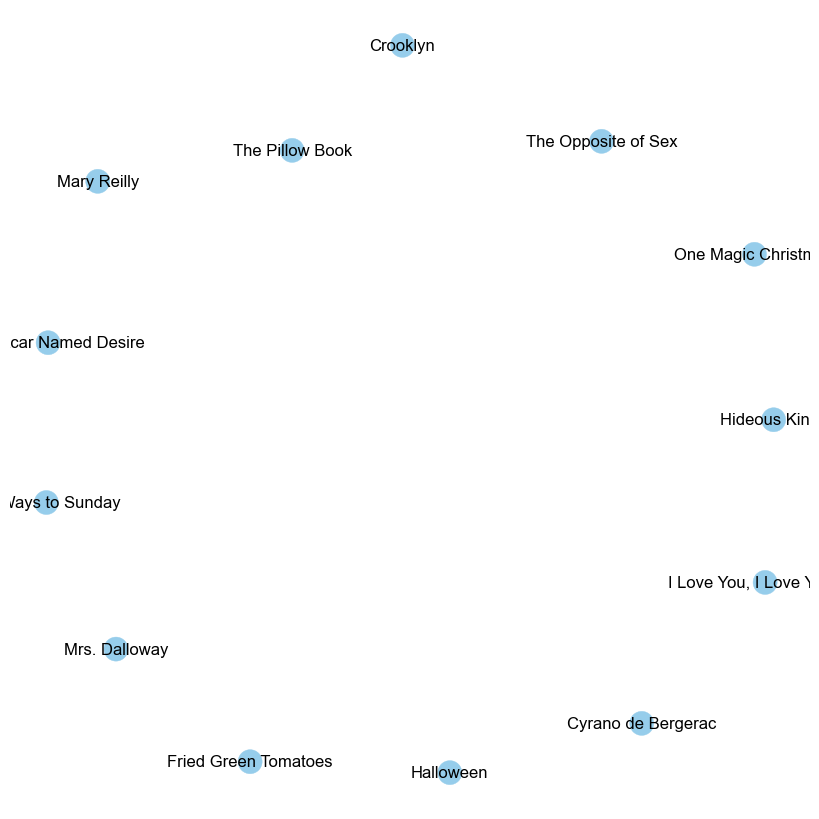

Cluster 15: ['Keiner liebt mich', 'Alien Escape', 'The Naked Man']


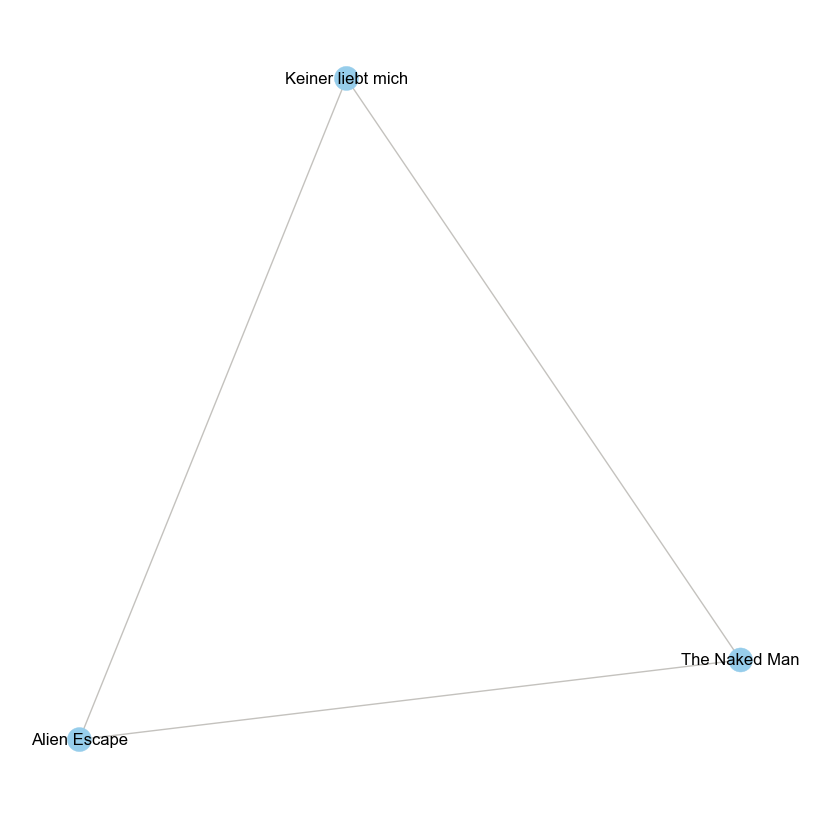

Cluster 21: ['Before and After', 'Death and the Maiden', 'Fluke', "Jason's Lyric", 'With Honors', 'Flesh and Bone', 'Guilty as Sin', 'Hard Target', 'Made in America', 'Dial M for Murder', 'La symphonie pastorale', 'Heathers', 'Paris, Texas', 'Audrey Rose', 'Blood and Wine', 'Trial and Error', 'Indian Summer', 'Caught Up', 'A Price Above Rubies', 'Carne trémula', 'This World, Then the Fireworks', 'Stage Fright', 'The Man Who Knew Too Much', 'Central do Brasil', 'Jack Frost', 'Nettoyage à sec', 'Goodbye Lover', 'Abre los ojos']


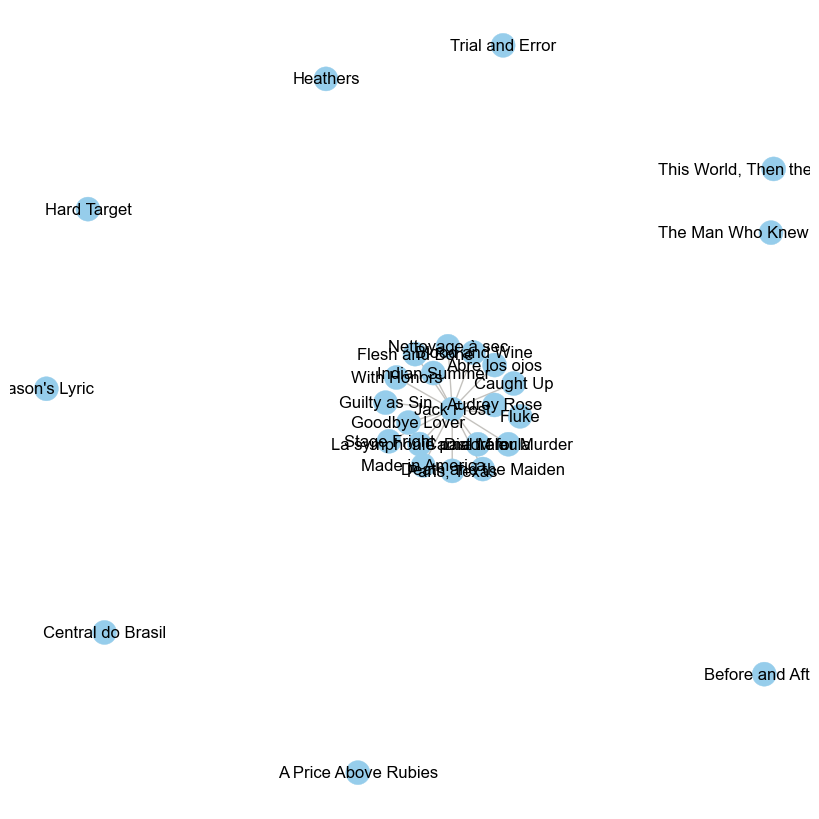

Cluster 28: ['Anne Frank Remembered', 'An Awfully Big Adventure', 'Crumb', 'Ed Wood', 'Farinelli', 'Panther', 'Quiz Show', 'Die Macht der Bilder: Leni Riefenstahl', 'Frank and Ollie', 'A Farewell to Arms', 'A Farewell to Arms', 'The Doors', 'JLG/JLG - autoportrait de décembre', 'Ben-Hur', 'The Crucible', 'Evita', 'Private Parts', 'Nowhere', 'The Horse Whisperer', 'Wild Man Blues', 'Viagem ao Princípio do Mundo', 'Hamlet', 'Out of Africa', 'The Poseidon Adventure', 'Firelight', 'Waltzes from Vienna', 'History of the World: Part I', 'Love Is the Devil: Study for a Portrait of Francis Bacon', 'Godzilla 1985', 'King Kong', 'Tea with Mussolini', 'The King and I', 'The Out-of-Towners']


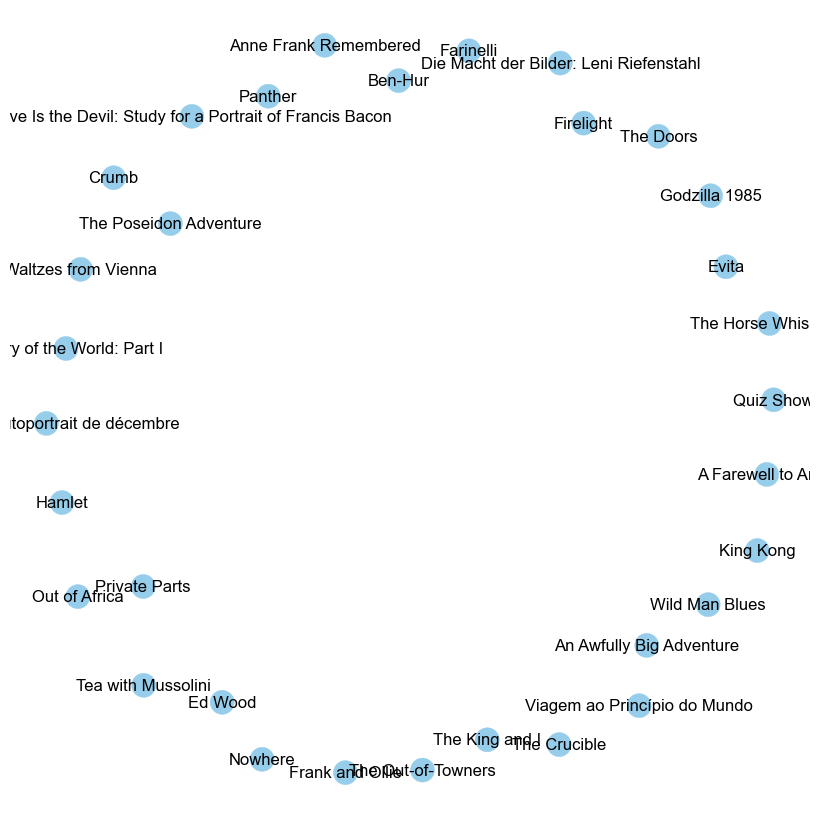

Cluster 14: ["The Young Poisoner's Handbook", 'Target', 'The Basketball Diaries', 'Total Eclipse', 'Unzipped', 'Wild Bill', 'Pulp Fiction', 'Prêt-à-Porter', 'Trois couleurs : Rouge', 'Little Buddha', 'Mrs. Parker and the Vicious Circle', 'Speechless', 'Wyatt Earp', 'Street Fighter', '8 Seconds', 'Fear of a Black Hat', 'Romeo + Juliet', 'Aladdin and the King of Thieves', 'Charms Zwischenfälle', 'Hustler White', 'Snowriders', 'The Cook, the Thief, His Wife & Her Lover', 'Henry V', 'The Whole Wide World', 'Year of the Horse', 'Metropolitan', 'The Absent-Minded Professor', 'The Muppet Christmas Carol', 'Steamboat Willie', 'Wilde', 'Hilary and Jackie', 'The Empty Mirror']


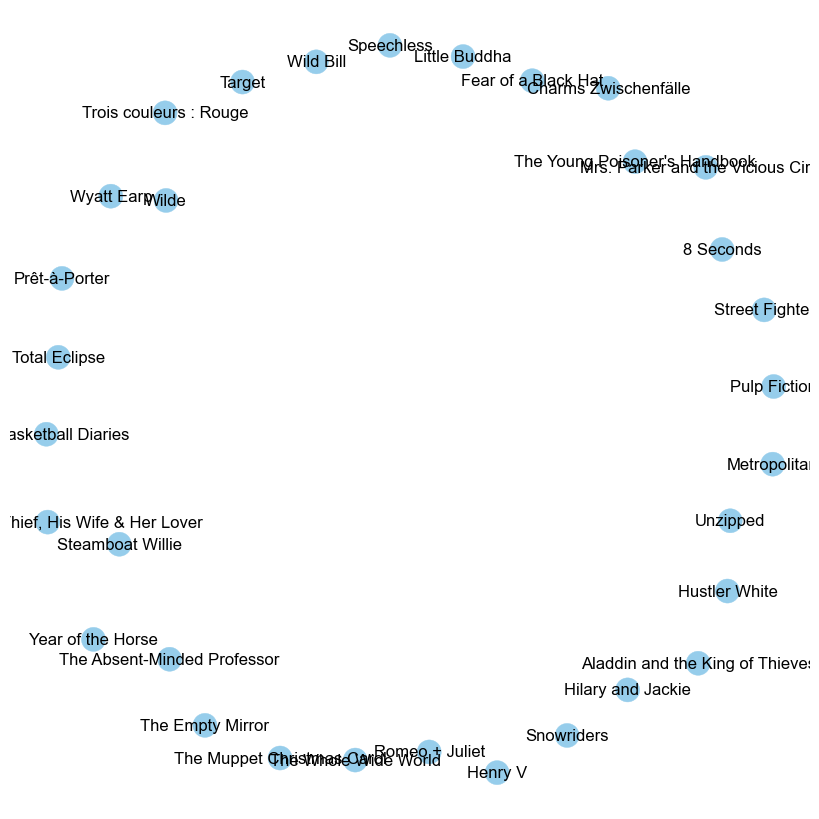

Cluster 29: ['Moonlight and Valentino', 'The Baby-Sitters Club', 'In the Army Now', 'The New Age', 'The Program', 'Mina Tannenbaum', 'Dear God', 'The Blues Brothers', 'Mitt liv som hund', 'B.A.P.S.', 'The Joy Luck Club', 'Men with Guns', 'Homegrown', 'The Big One', 'Dancer, Texas Pop. 81', 'I Got the Hook Up', "Can't Hardly Wait", 'بچه\u200cهای آسمان', 'The Breakfast Club', 'The Incredible Journey', 'First Love, Last Rites', 'Weird Science', 'Cube', 'Belly', 'Police Academy 6: City Under Siege', 'Cocoon: The Return', 'The Garbage Pail Kids Movie', "Relax... It's Just Sex", 'Children of the Damned', 'Los amantes del círculo polar', 'SLC Punk', 'A Little Bit of Soul']


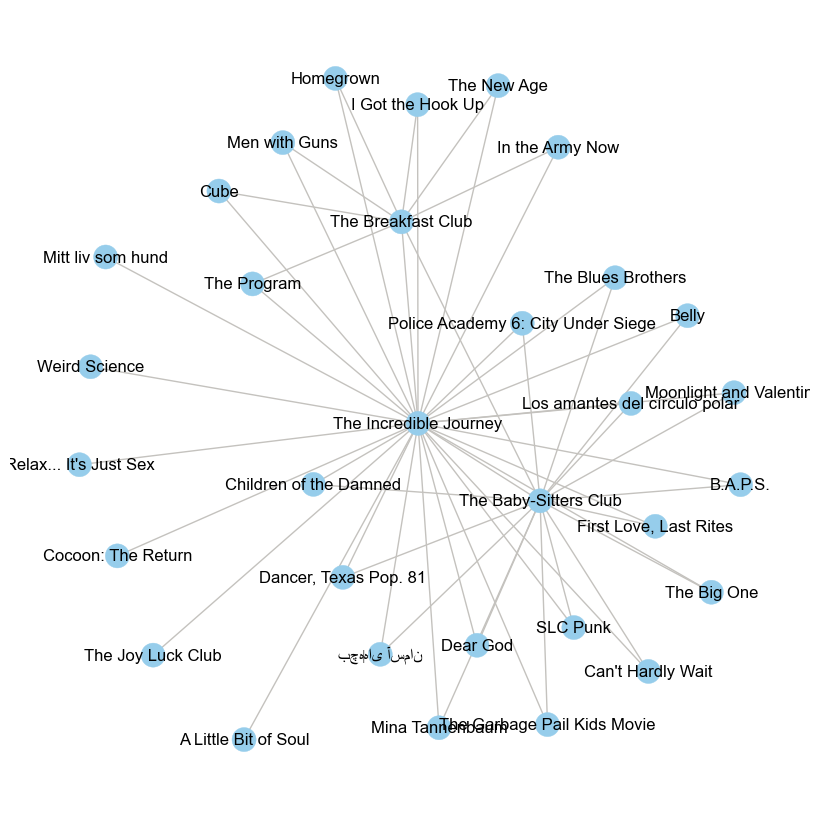

Cluster 31: ['Nemesis 2 - Nebula', 'Hot Shots! Part Deux', 'The Old Man and the Sea', 'North Star', 'Escape from New York', 'Mediterraneo', 'Aliens', 'Das Boot', 'An American Werewolf in London', 'Star Trek: First Contact', 'Star Trek IV: The Voyage Home', 'The Last of the Mohicans', 'Men in Black', 'Event Horizon', 'Deep Rising', 'Sphere', 'Chinese Box', 'Lifeboat', 'Secret Agent', "We're No Angels", 'King Kong Lives', 'Cocoon', 'The Last Days', 'سیب', "Airport '77", "The Concorde... Airport '79", 'Beyond the Poseidon Adventure']


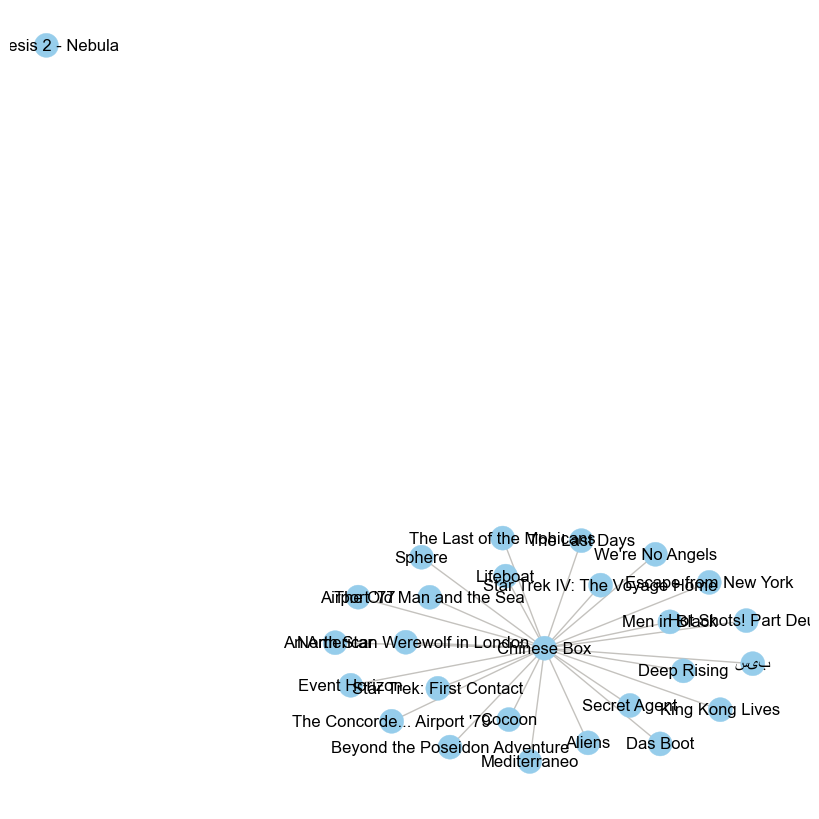

Cluster 49: ['Backbeat', 'Enchanted April', 'Nosferatu, eine Symphonie des Grauens', 'The Great Ziegfeld', 'Candleshoe', 'In Search of the Castaways']


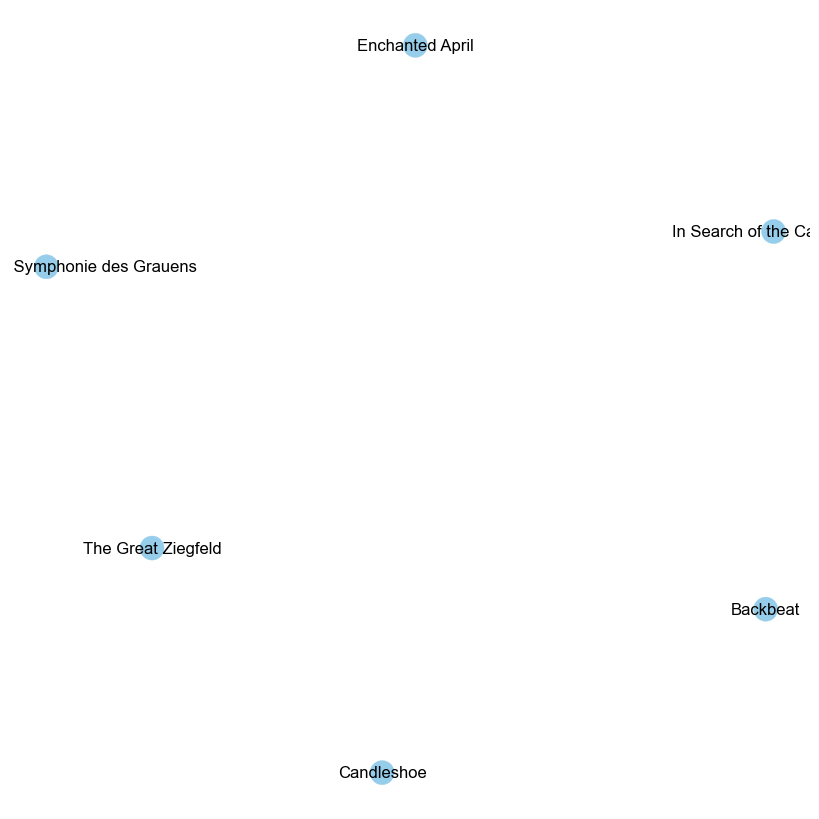

Cluster 25: ['Buddy']


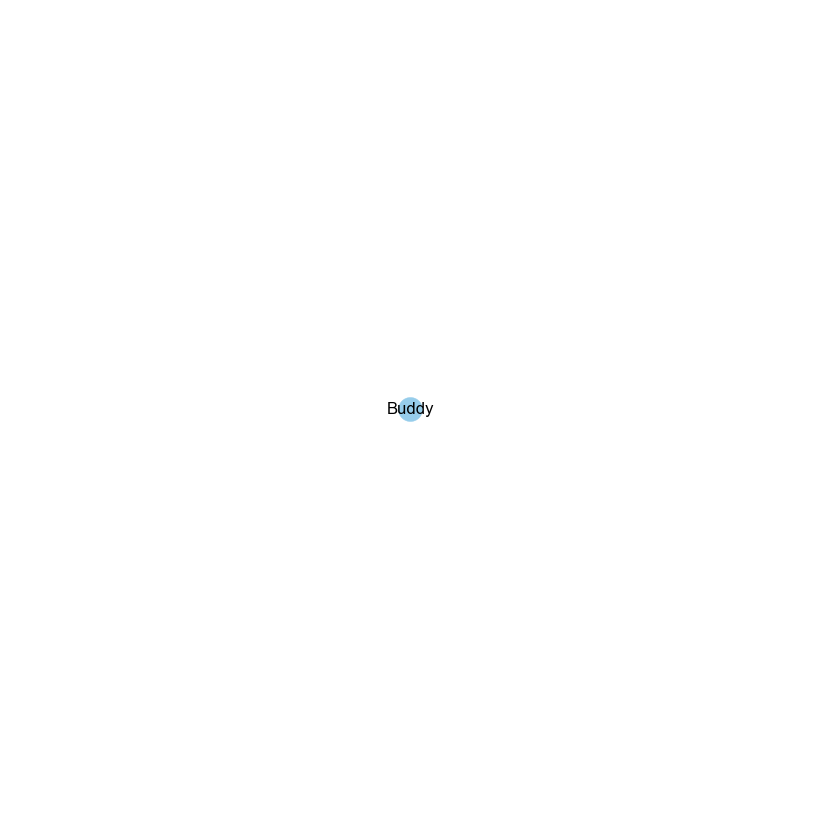

Cluster 44: ['The Next Step']


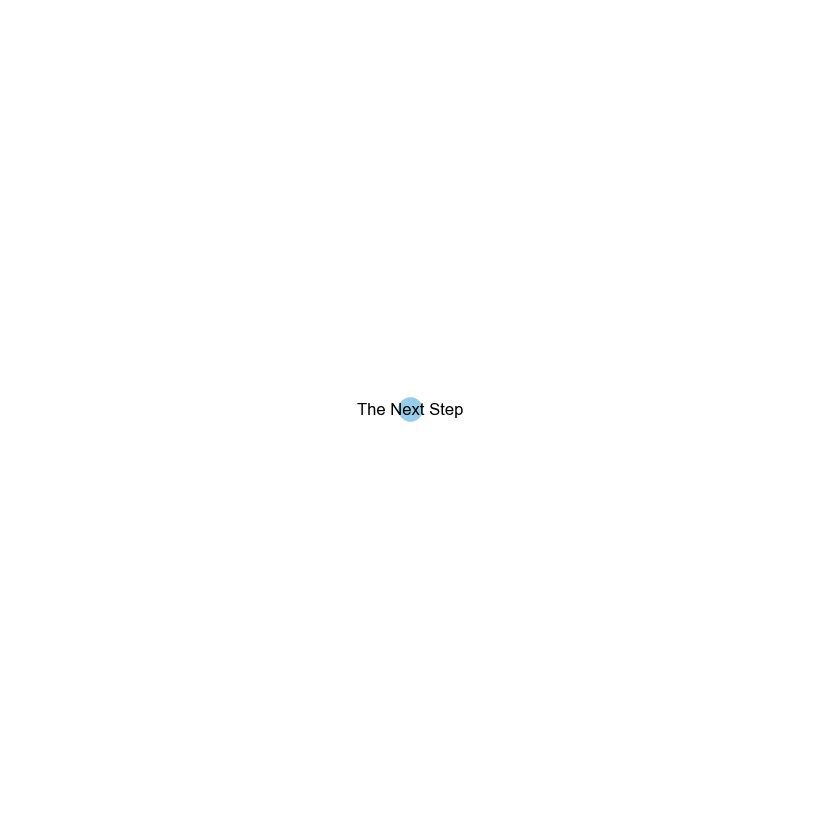

Cluster 11: ['Tar']


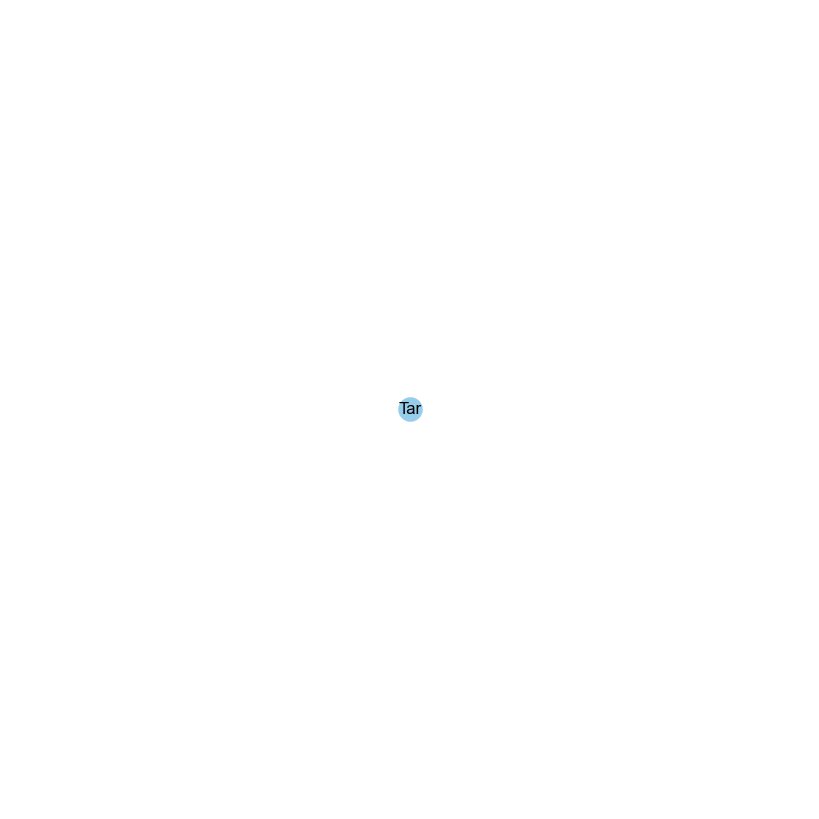

Cluster 48: ['Never Met Picasso']


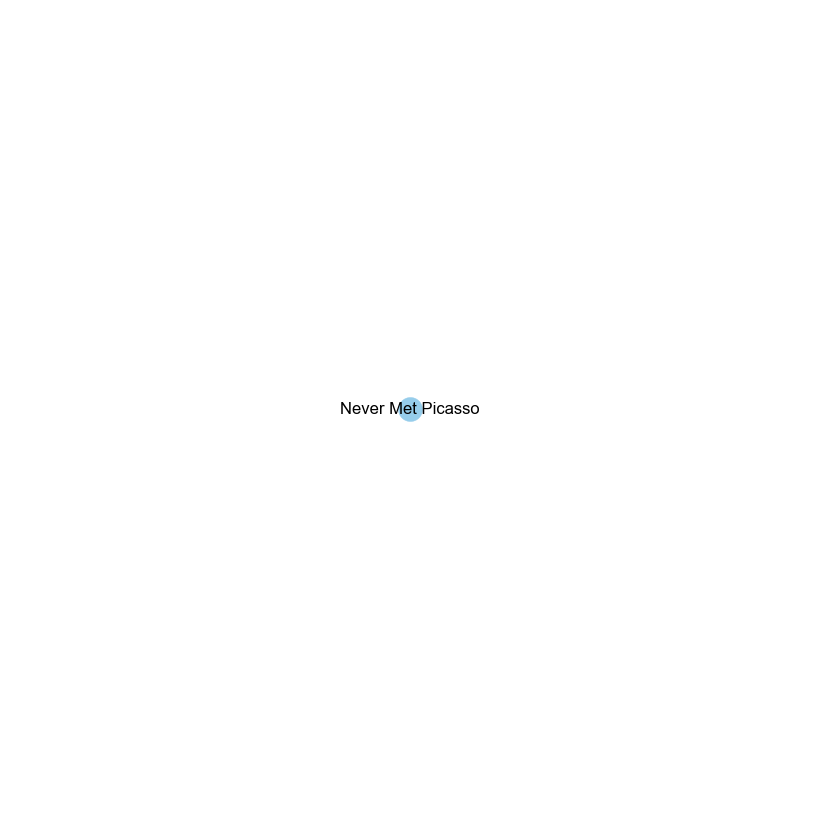

Cluster 41: ['The Life of Emile Zola']


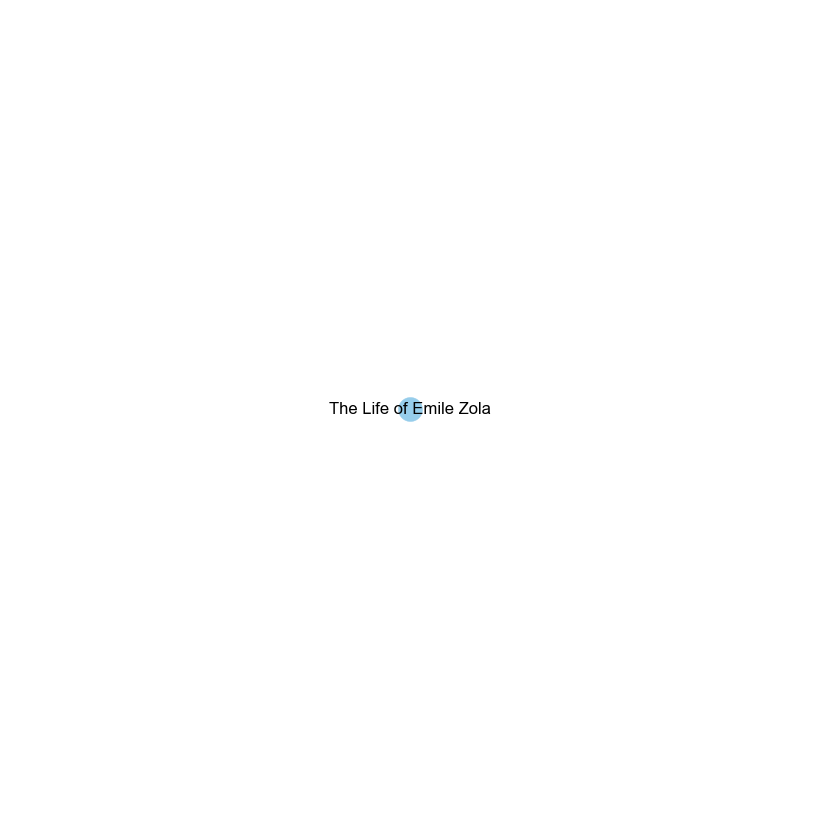

In [ ]:
def draw_cluster_subgraph(cluster, size='s'):
    cluster_subgraph = G.subgraph(cluster)
    colors = []
    for node_name in cluster_subgraph.nodes():
        # Retrieve the node from the graph using its name
        node = G.nodes[node_name]
        # Determine node color based on node label
        if node['label'] == 'MOVIE':
            colors.append('#96cdeb')
        elif node['label'] == 'PERSON':
            colors.append('#ed859d')
        elif node['label'] == 'CAT':
            colors.append('#9ce087')
        elif node['label'] == 'COU':
            colors.append('#edf283')
        elif node['label'] == 'SIMILAR':
            colors.append('#edb672')
        elif node['label'] == 'CLUSTER':
            colors.append('#edb672')

    if size == 's':
        plt.figure(figsize=(8, 8))
    else:
        plt.figure(figsize=(15, 15))
    nx.draw(cluster_subgraph, with_labels=True, font_size=12,
            node_color=colors, edge_color='#c4c2be')
    plt.show()

for cluster_label, movies in movie_clusters.items():
    print(f"Cluster {cluster_label}: {movies}")
    draw_cluster_subgraph(movies)

## Colaborative Filtering

In [ ]:
# !pip install scikit-surprise

     ---------------------------------------- 0.0/772.0 kB ? eta -:--:--
     - -------------------------------------- 30.7/772.0 kB ? eta -:--:--
     - -------------------------------------- 30.7/772.0 kB ? eta -:--:--
     - -------------------------------------- 30.7/772.0 kB ? eta -:--:--
     - -------------------------------------- 30.7/772.0 kB ? eta -:--:--
     ---- -------------------------------- 92.2/772.0 kB 438.1 kB/s eta 0:00:02
     ---- -------------------------------- 92.2/772.0 kB 438.1 kB/s eta 0:00:02
     ---- -------------------------------- 92.2/772.0 kB 438.1 kB/s eta 0:00:02
     ---- -------------------------------- 92.2/772.0 kB 438.1 kB/s eta 0:00:02
     ---------- ------------------------- 225.3/772.0 kB 551.4 kB/s eta 0:00:01
     ---------- ------------------------- 225.3/772.0 kB 551.4 kB/s eta 0:00:01
     ---------- ------------------------- 225.3/772.0 kB 551.4 kB/s eta 0:00:01
     ---------- ------------------------- 225.3/772.0 kB 551.4 kB/s eta

In [50]:
import surprise
from surprise import Reader, Dataset, SVD

In [52]:
movie_id=pd.read_csv('movies.csv',index_col='movieId')
movie_id.drop(columns='genres',inplace=True)
movie_id.head()

title
movieId                                    
1                          Toy Story (1995)
2                            Jumanji (1995)
3                   Grumpier Old Men (1995)
4                  Waiting to Exhale (1995)
5        Father of the Bride Part II (1995)

In [53]:
import re
movie_id=movie_id['title'].str.replace(r'\s\(\d{4}\)$', '', regex=True)
movie_id.head()

movieId
1                      Toy Story
2                        Jumanji
3               Grumpier Old Men
4              Waiting to Exhale
5    Father of the Bride Part II
Name: title, dtype: object

In [54]:
movie_id=movie_id.to_dict()

In [ ]:
user_ratings=pd.read_csv('ratings_small.csv')
user_ratings.head()

userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179
2       1     1061     3.0  1260759182
3       1     1129     2.0  1260759185
4       1     1172     4.0  1260759205

In [55]:
reader=Reader(rating_scale=(1,5))
data = Dataset.load_from_df(user_ratings[['userId', 'movieId', 'rating']], reader)
trainset = data.build_full_trainset()
algo = SVD()
algo.fit(trainset)

def collaborative_recommendations(user_id,user_ratings,n=5):
    all_movie_ids = user_ratings['movieId'].unique()
    rated_items_by_user = [rating_tuple[0] for rating_tuple in trainset.ur[user_id]]
    items_unseen_by_user = [item_id for item_id in all_movie_ids if item_id not in rated_items_by_user]

    predictions = [algo.predict(user_id, item_id) for item_id in items_unseen_by_user]
    top_n = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]

    return top_n

# Hybrid Recommendation

In [177]:
user_id=3
user_movie_titles=user_ratings.loc[user_ratings.userId==user_id]['movieId'].apply(lambda x: movie_id.get(x))
pd.concat([user_ratings.loc[user_ratings.userId==user_id],user_movie_titles],axis=1).sort_values(by='rating',ascending=False)


userId movieId  rating   timestamp  \
130       3    2959     5.0  1298862874   
101       3     318     5.0  1298862121   
103       3     356     5.0  1298862167   
133       3    3949     5.0  1298863174   
113       3    1197     5.0  1298932770   
100       3     296     4.5  1298862418   
143       3   48783     4.5  1298862361   
144       3   50068     4.5  1298862467   
119       3    1721     4.5  1298923236   
132       3    3510     4.0  1298861633   
115       3    1235     4.0  1298861628   
129       3    2858     4.0  1298921825   
128       3    2841     4.0  1298861733   
122       3    2318     4.0  1298861753   
97        3     110     4.0  1298922049   
120       3    1884     4.0  1298863143   
117       3    1378     4.0  1298861658   
121       3    2028     4.0  1298921862   
146       3   84236     4.0  1298922130   
111       3     778     4.0  1298863157   
142       3   44191     3.5  1298932740   
141       3   27369     3.5  1298862555   
139       3    8622     3.5  1298861650   
127       3    2762     3.5  1298922057   
125       3    2702     3.5  1298861796   
135       3    5669     3.5  1298862672   
98        3     247     3.5  1298861637   
110       3     736     3.5  1298932787   
118       3    1580     3.5  1298922089   
99        3     267     3.0  1298861761   
134       3    5349     3.0  1298923266   
140       3    8636     3.0  1298932766   
145       3   58559     3.0  1298922071   
138       3    7361     3.0  1298922065   
136       3    6377     3.0  1298922080   
114       3    1210     3.0  1298921795   
131       3    3243     3.0  1298861968   
116       3    1271     3.0  1298861605   
105       3     527     3.0  1298862528   
106       3     588     3.0  1298922100   
107       3     592     3.0  1298923247   
126       3    2716     3.0  1298924017   
124       3    2694     3.0  1298862710   
123       3    2513     3.0  1298861789   
108       3     593     3.0  1298921840   
112       3     866     3.0  1298861687   
96        3      60     3.0  1298861675   
102       3     355     2.5  1298861589   
104       3     377     2.5  1298923242   
137       3    7153     2.5  1298921787   
109       3     595     2.0  1298923260   

                                            movieId  
130                                      Fight Club  
101                       Shawshank Redemption, The  
103                                    Forrest Gump  
133                             Requiem for a Dream  
113                             Princess Bride, The  
100                                    Pulp Fiction  
143                            Flags of Our Fathers  
144                           Letters from Iwo Jima  
119                                         Titanic  
132                                       Frequency  
115                                Harold and Maude  
129                                 American Beauty  
128                                  Stir of Echoes  
122                                       Happiness  
97                                       Braveheart  
120                  Fear and Loathing in Las Vegas  
117                                      Young Guns  
121                             Saving Private Ryan  
146                                            None  
111                                   Trainspotting  
142                                  V for Vendetta  
141                          Daria: Is It Fall Yet?  
139                                 Fahrenheit 9/11  
127                                Sixth Sense, The  
125                                   Summer of Sam  
135                           Bowling for Columbine  
98                               Heavenly Creatures  
110                                         Twister  
118                       Men in Black (a.k.a. MIB)  
99                                      Major Payne  
134                                      Spider-Man  
140                                    S

Collaborative Recommendations:
        est                              title
0  4.517912                     Godfather, The
1  4.420397                        Rear Window
2  4.328004                         Fight Club
3  4.257428  Lock, Stock & Two Smoking Barrels
4  4.248908            Godfather: Part II, The
****************************************

 Movie: Jade

****************************************


C:\Users\subha\AppData\Local\Temp\ipykernel_15132\451019433.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  user_choices=user_ratings[user_ratings.userId==user_id][user_ratings.rating>=4].sort_values(by='rating')


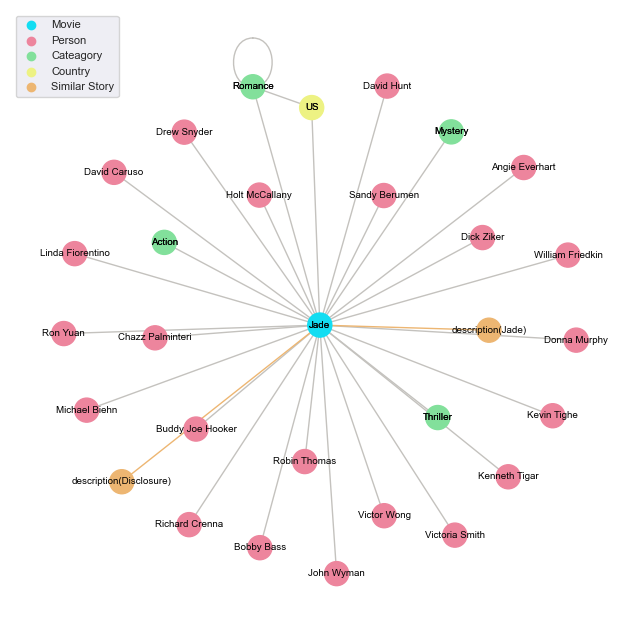



****************************************************************************************************

 Extended Recommendation with Attributes
****************************************************************************************************


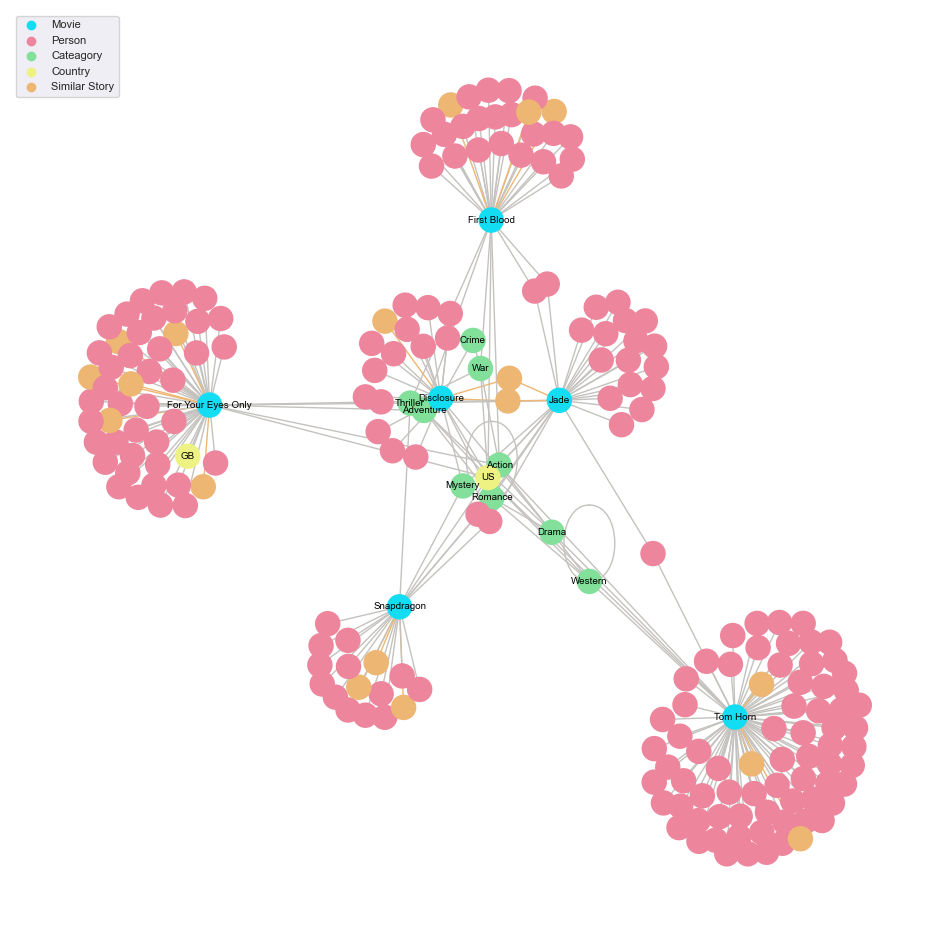

****************************************

 Movie: Pie in the Sky

****************************************


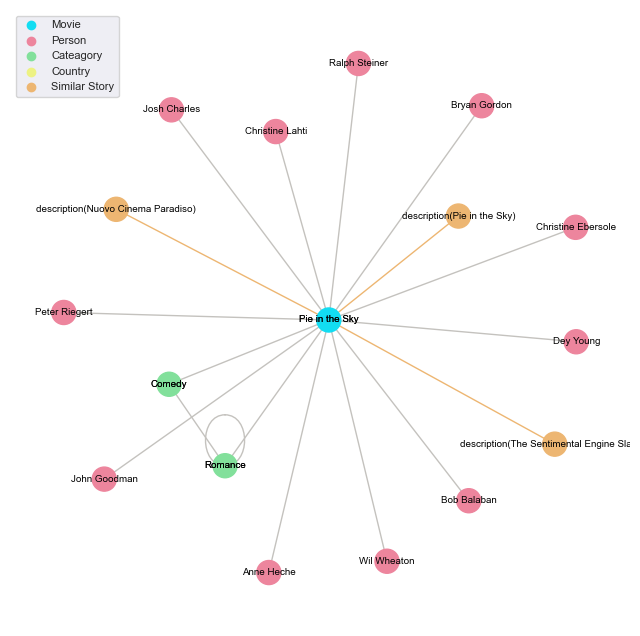



****************************************************************************************************

 Extended Recommendation with Attributes
****************************************************************************************************


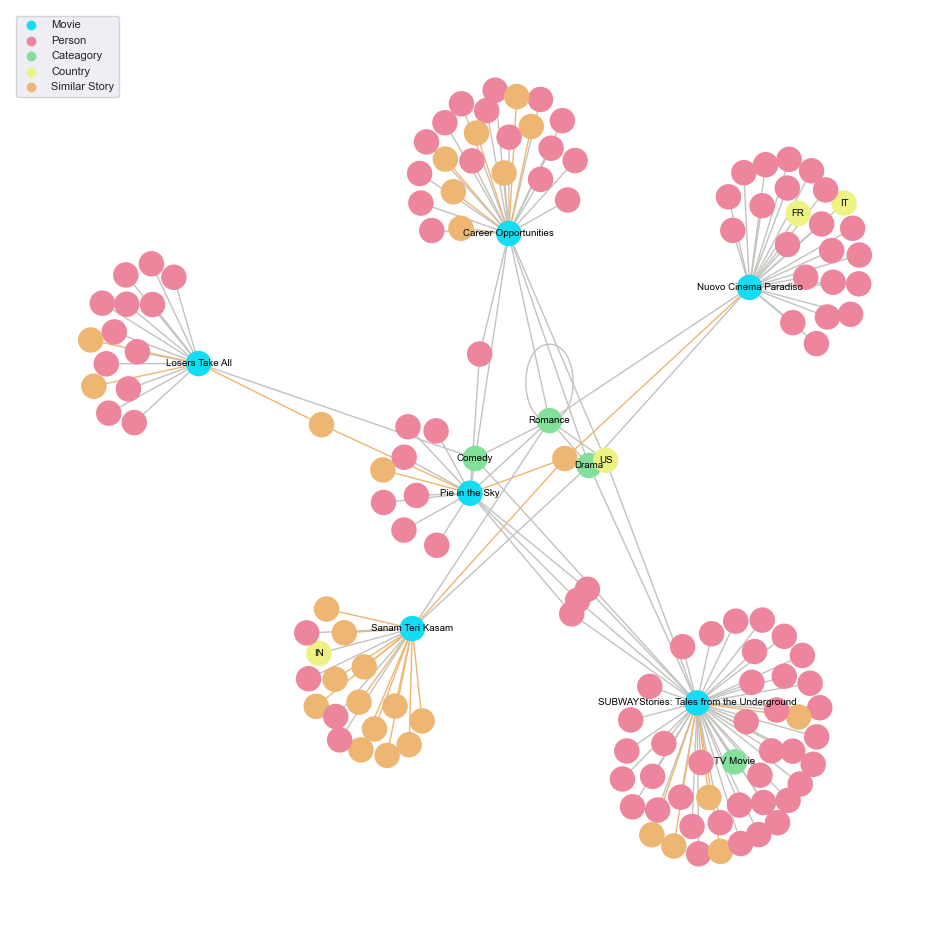

****************************************

 Movie: Jupiter's Wife

****************************************


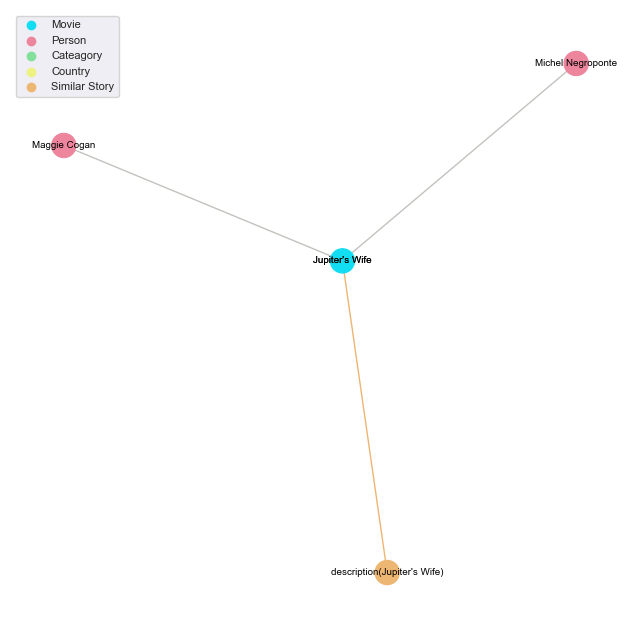



****************************************************************************************************

 Extended Recommendation with Attributes
****************************************************************************************************


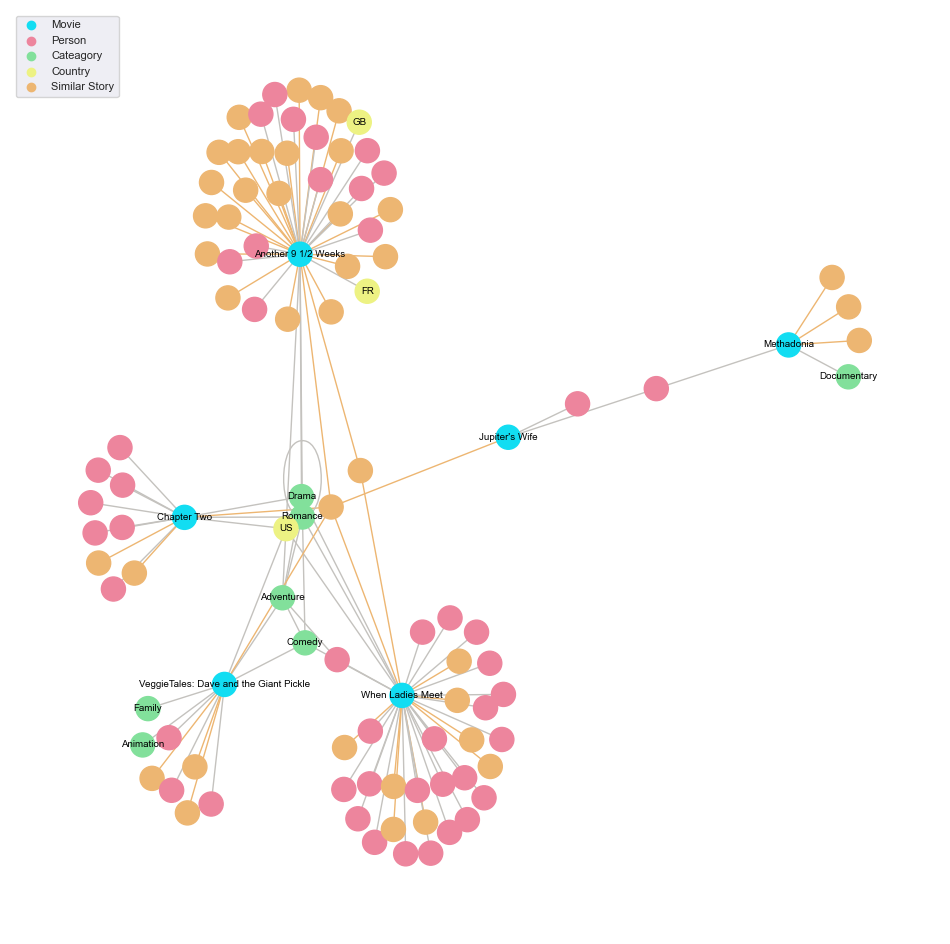

****************************************

 Movie: Boomerang

****************************************


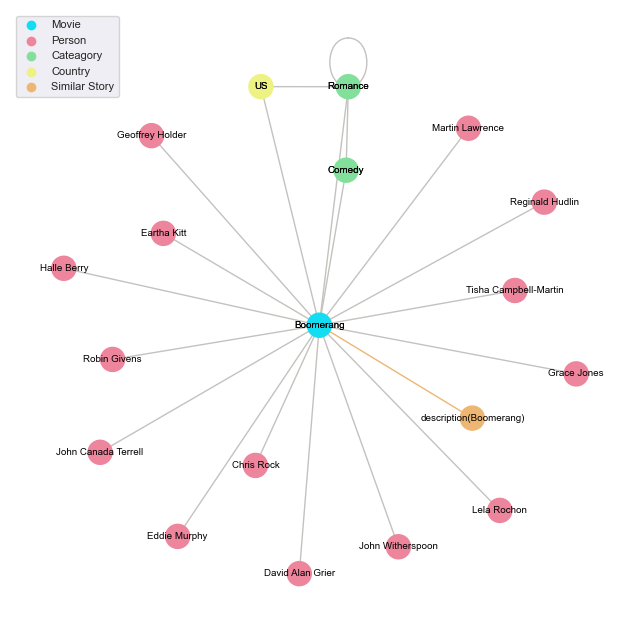



****************************************************************************************************

 Extended Recommendation with Attributes
****************************************************************************************************


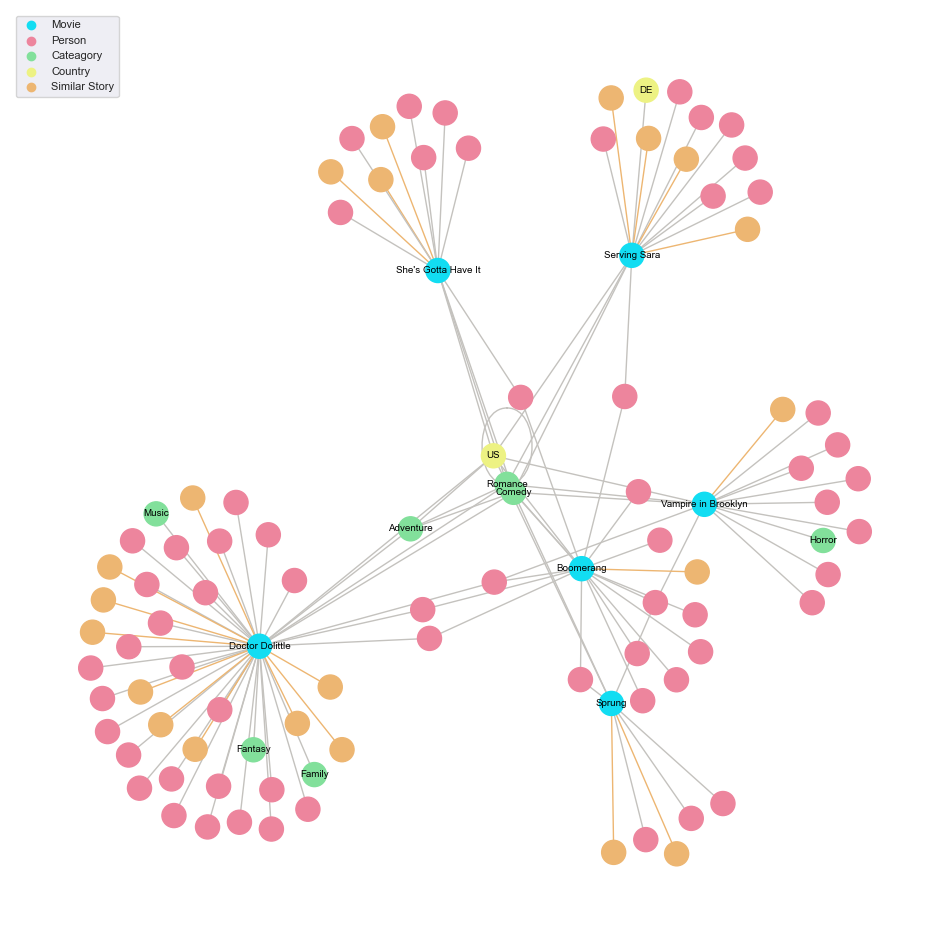

Content Based Recommendations:
                  title     Score
0            Disclosure  4.582732
1          Serving Sara  3.546257
2   She's Gotta Have It  3.546257
3  Career Opportunities  3.338410
4       Doctor Dolittle  3.278795
5            Snapdragon  3.053034
6            Methadonia  2.885390
7                Sprung  2.605929
8    For Your Eyes Only  2.497383
9              Tom Horn  2.265055


In [183]:
# final Recommendations

collab_recomm=pd.DataFrame(collaborative_recommendations(user_id,user_ratings))
collab_recomm['title']=collab_recomm.iid.apply(lambda x: movie_id.get(x))
collab_recomm.drop(columns=['uid','r_ui','details','iid'],inplace=True)
print("Collaborative Recommendations:")
print(collab_recomm.head())
database_movies_ids=df.title.unique()
user_choices=user_ratings[user_ratings.userId==user_id][user_ratings.rating>=4].sort_values(by='rating')
if len(user_choices>5):
        user_choices=user_choices.head()
content_based_recomm=pd.DataFrame()
for i in user_choices.index:
        id=movie_id.get(i,'movieId')
        if id not in database_movies_ids:
                continue
        results=content_based_recommendations(id)
        results['title']=results.index
        results.rename(columns={0:'Score'},inplace=True)
        results.reset_index()
        results.Score*=rowi.rating**0.5        
        content_based_recomm = pd.concat([content_based_recomm,results], axis=0,ignore_index=True)
content_based_recomm=content_based_recomm.groupby('title')['Score'].max().reset_index().sort_values(by='Score',ascending=False).reset_index(drop=True)
print("Content Based Recommendations:")
print(content_based_recomm.head(10))
final_recommendations=pd.concat([collab_recomm.title.head(5),content_based_recomm.title.head(5)],axis=0)


In [185]:
final_recommendations.tolist()

['Godfather, The',
 'Rear Window',
 'Fight Club',
 'Lock, Stock & Two Smoking Barrels',
 'Godfather: Part II, The',
 'Disclosure',
 'Serving Sara',
 "She's Gotta Have It",
 'Career Opportunities',
 'Doctor Dolittle']